<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# WALMART sales forecasting 26.08.24

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

  <p>Walmart, a leading retail corporation, owes a vast chain of hypermarkets across the globe. This dataset, provided by Walmart, contains information from 45 different stores, including store-specific details. The sales data is recorded on a weekly basis, and the dataset also marks the weeks corresponding to major holidays: Christmas, Thanksgiving, Super Bowl, and Labor Day.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Business Objectives:</h2>
  <p>The primary objective of this analysis is to predict the weekly sales for each store. The dataset includes time-based factors (such as the week of the year) and space-based factors (such as store size), which could potentially influence sales. Additionally, a key focus of this analysis is to determine how the inclusion of holidays in a week affects store sales. Specifically, we aim to understand if sales significantly increase during holiday weeks and how these fluctuations vary across different stores.</p>

  
  </ul>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 1. Data loading and merging

</div>


In [1]:
import pandas as pd

# Paths to the CSV files
file_paths = ['test.csv', 'train.csv', 'stores.csv', 'features.csv']

# Loading the CSV files into DataFrames
df_test, df_train, df_stores, df_features = [pd.read_csv(file) for file in file_paths]

# Displaying the first few rows of each DataFrame
print("Test DataFrame:")
print(df_test.head(), "\n")

print("Train DataFrame:")
print(df_train.head(), "\n")

print("Stores DataFrame:")
print(df_stores.head(), "\n")

print("Features DataFrame:")
print(df_features.head(), "\n")


Test DataFrame:
   Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False 

Train DataFrame:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False 

Stores DataFrame:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875 

Features DataFrame:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93     

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Merging

</div>

In [2]:
# Merging DataFrames
df = (df_train
      .merge(df_features, on=['Store', 'Date'], how='inner')
      .merge(df_stores, on='Store', how='inner'))

# Dropping duplicated column and renaming
df = (df
      .drop(columns=['IsHoliday_y'])
      .rename(columns={'IsHoliday_x': 'IsHoliday'}))

# Displaying the first 5 rows
df.head(5)


Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     1  2010-02-12      46039.49       True        38.51       2.548   
2      1     1  2010-02-19      41595.55      False        39.93       2.514   
3      1     1  2010-02-26      19403.54      False        46.63       2.561   
4      1     1  2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 2.Basic statistics

</div>

In [3]:
df.shape

(421570, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Basic Statistics Summary</h1>
  <p>This dataset from Walmart includes weekly sales data from various stores, along with details on markdowns, holidays, and macroeconomic indicators. It captures sales performance and external factors affecting sales across different stores.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Key Insights:</h2>
  <ul>
    <li><strong>Sales Data:</strong> Represents weekly revenue, crucial for forecasting.</li>
    <li><strong>Markdowns:</strong> Various types of discounts offered, with some data missing. This affects sales.</li>
    <li><strong>Holidays:</strong> Significant impact on sales. Analysis needed to measure this effect.</li>
    <li><strong>Macroeconomic Indicators:</strong> Includes temperature, fuel price, CPI, and unemployment rates, influencing sales performance.</li>
    <li><strong>Store Characteristics:</strong> Type and size of stores may affect sales outcomes.</li>
  </ul>

 
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 3.Data quality issues
</div>

In [5]:
df.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        3.361027    7246.420196    3334.628621    1439.421384   
std         0.458515    8291.221345    9475.357325    9623.078290   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    2240.270000      41.600000       5.080000   
50%         3.452000    5347.450000     192.000000      24.600000   
75%         3.738000    9210.900000    1926.940000     103.990000   
max         4.468000   88646.760000  104519.540000  141630.610000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  134967.000000  151432.000000  421570.000000  421570.000000   
mean     3383.168256    4628.975079     171.201947       7.960289   
std      6292.384031    5962.887455      39.159276       1.863296   
min         0.220000     135.160000     126.064000       3.879000   
25%       504.220000    1878.440000     132.022667       6.891000   
50%      1481.310000    3359.450000     182.318780       7.866000   
75%      3595.040000    5563.800000     212.416993       8.572000   
max     67474.850000  108519.280000     227.232807      14.313000   

                Size  
count  421570.000000  
mean   136727.915739  
std     60980.583328  
min     34875.000000  
25%     93638.000000  
50%    140167.000000  
75%    202505.000000  
max    219622.000000

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Data Quality Issues we discovered</h1>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Weekly Sales:</h2>
  <p><strong>Issue:</strong> The dataset includes negative values for weekly sales, with a minimum recorded as -$4,988.94. This is atypical as sales figures should generally be non-negative.</p>
  
 

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Markdown Columns:</h2>
  <p><strong>Issue:</strong> Certain markdown columns contain zero values:</p>
  <ul>
    
  </ul>
  
  </ol>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## DQ issues handling-weekly sales

</div>


In [6]:

negative_sales_df = df[df['Weekly_Sales'] < 0]


In [7]:
#Displaying a few first rows<0
print(negative_sales_df.head())


      Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
846       1     6  2012-08-10       -139.65      False        85.05   
2384      1    18  2012-05-04         -1.27      False        75.55   
6048      1    47  2010-02-19       -863.00      False        39.93   
6049      1    47  2010-03-12       -698.00      False        57.79   
6051      1    47  2010-10-08        -58.00      False        63.93   

      Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
846        3.494   11436.22      245.0       6.85    6964.26    4836.22   
2384       3.749   21290.13        NaN      69.89    4977.35    3261.04   
6048       2.514        NaN        NaN        NaN        NaN        NaN   
6049       2.667        NaN        NaN        NaN        NaN        NaN   
6051       2.633        NaN        NaN        NaN        NaN        NaN   

             CPI  Unemployment Type    Size  
846   221.958433         6.908    A  151315  
2384  221.671800         7.143

In [8]:
# Displaying statistics for other columns in the context of negative sales values
print(negative_sales_df[['Store', 'Dept', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']].describe())


             Store         Dept  Temperature   Fuel_Price     MarkDown1  \
count  1285.000000  1285.000000  1285.000000  1285.000000    481.000000   
mean     23.858366    49.999222    59.954078     3.406292   6821.195031   
std      12.033126    24.394330    18.346794     0.453768   7745.309031   
min       1.000000     5.000000    -2.060000     2.514000      2.120000   
25%      15.000000    31.000000    46.650000     2.976000   2095.310000   
50%      22.000000    47.000000    62.170000     3.506000   5430.750000   
75%      35.000000    59.000000    73.400000     3.787000   8708.200000   
max      45.000000    99.000000    95.910000     4.468000  65021.230000   

          MarkDown2      MarkDown3     MarkDown4      MarkDown5          CPI  \
count    330.000000     424.000000    432.000000     484.000000  1285.000000   
mean    4918.016697     741.035307   2900.351389    4472.117583   167.864301   
std    13652.405534    6361.180096   5470.741542    6850.274900    38.032214   
min 

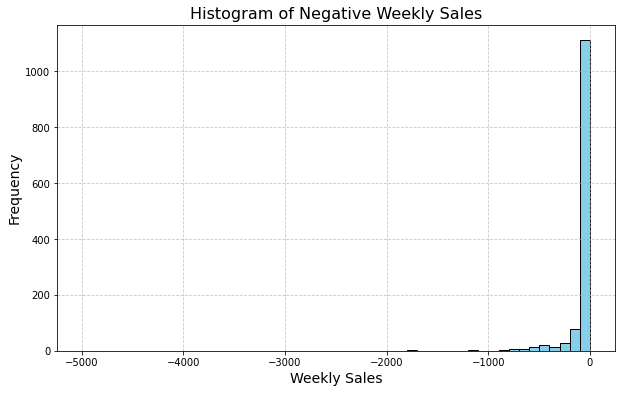

In [9]:
import matplotlib.pyplot as plt

# Larger and more visually appealing histogram of negative sales values
plt.figure(figsize=(10, 6))  # Increase the size of the plot
plt.hist(negative_sales_df['Weekly_Sales'], bins=50, edgecolor='black', color='skyblue')
plt.title('Histogram of Negative Weekly Sales', fontsize=16)
plt.xlabel('Weekly Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add a light grid for better readability
plt.show()



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <h1 style="font-size: 24px; font-weight: bold; text-align: center;">Weekly Sales Data Quality Issues  Recommended Actions</h1>

  <p><strong>Action:</strong></p>
  <ol>
    <li>If it is possible in real project, examine these negative sales values to understand their origin.</li>
    <li>Determine if they are due to data entry errors or other factors-if possible.</li>
    <li>Consult the data source or industry experts to validate these anomalies if possible .</li>
    <li>As negative sales values are unlikely to be valid, we decide to remove these records from the dataset as it is not possible to discuss the date with client.</li>
  </ol>
  <p><strong>Removal Statistics:</strong> Out of a total of 421,570 records, there are 1,285 records with negative sales values. Removing these records will result in a reduction of approximately 0.31% of the dataset.</p>

  
</div>


In [10]:
# Assuming your DataFrame is named df
# Filter out rows where Weekly_Sales is negative
df = df[df['Weekly_Sales'] >= 0]



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Handling anomalies-markdown

</div>


In [11]:


# Assuming your DataFrame is named df
# List of markdown columns to process
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Replace negative values and NaN with 0 for the specified markdown columns
for column in markdown_columns:
    df[column] = df[column].apply(lambda x: 0 if pd.isna(x) or x < 0 else x)

# Verify the changes
print(df[markdown_columns].describe())


           MarkDown1      MarkDown2      MarkDown3      MarkDown4  \
count  420285.000000  420285.000000  420285.000000  420285.000000   
mean     2590.187246     878.898468     468.776513    1083.462694   
std      6053.225499    5076.506949    5533.592652    3895.801513   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%      2801.500000       2.400000       4.540000     425.290000   
max     88646.760000  104519.540000  141630.610000   67474.850000   

           MarkDown5  
count  420285.000000  
mean     1662.706138  
std      4205.946641  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%      2168.040000  
max    108519.280000  


<div style="background-color: #F9F9F9; padding: 15px; border-radius: 5px; font-size: 14px;">
  <p><strong>Filling Missing Markdown Values:</strong></p>
  <p>For the markdown columns with missing values (NaN) or negative values, we will replace them with zeros. Negative values in these columns are typically data errors, as markdowns represent discounts which should not be negative. Filling missing values with zeros ensures data consistency and allows for more accurate subsequent analysis.</p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 4. EDA

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 4.1 Univariate analysis-weekly sales

</div>

In [12]:
# Convert the 'Date' column to datetime format (if it's not already in this format)
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month, year, and week number from the 'Date' column
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['week'] = df['Date'].dt.isocalendar().week

# Display the first few rows to confirm
print(df[['Store', 'Dept', 'Date', 'month', 'year', 'week', 'Weekly_Sales']].head())


   Store  Dept       Date  month  year  week  Weekly_Sales
0      1     1 2010-02-05      2  2010     5      24924.50
1      1     1 2010-02-12      2  2010     6      46039.49
2      1     1 2010-02-19      2  2010     7      41595.55
3      1     1 2010-02-26      2  2010     8      19403.54
4      1     1 2010-03-05      3  2010     9      21827.90


In [15]:
from tabulate import tabulate

# Assuming 'df' is already defined and contains the required data
# Grouping data and calculating monthly sales totals for each year
monthly_sales = df.groupby(['year', 'month'])['Weekly_Sales'].sum().reset_index()

# Grouping data and calculating weekly sales totals for each year
weekly_sales = df.groupby(['year', 'week'])['Weekly_Sales'].sum().reset_index()

# Convert to millions (M) for better understanding of results
monthly_sales['Weekly_Sales'] = monthly_sales['Weekly_Sales'] / 1_000_000
weekly_sales['Weekly_Sales'] = weekly_sales['Weekly_Sales'] / 1_000_000

# Pivot the table to a wider format
monthly_sales_pivot = monthly_sales.pivot(index='month', columns='year', values='Weekly_Sales')
weekly_sales_pivot = weekly_sales.pivot(index='week', columns='year', values='Weekly_Sales')

# Formatting the monthly and weekly sales tables
monthly_table = tabulate(monthly_sales_pivot.round(2), headers=monthly_sales_pivot.columns, showindex=True, tablefmt="fancy_grid").split('\n')
weekly_table = tabulate(weekly_sales_pivot.round(2), headers=weekly_sales_pivot.columns, showindex=True, tablefmt="fancy_grid").split('\n')

# Find the maximum length of both tables for consistent formatting
max_len_monthly = max(len(line) for line in monthly_table)
max_len_weekly = max(len(line) for line in weekly_table)
max_height = max(len(monthly_table), len(weekly_table))

# Extend lines to the maximum height of both tables
monthly_table.extend([' ' * max_len_monthly] * (max_height - len(monthly_table)))
weekly_table.extend([' ' * max_len_weekly] * (max_height - len(weekly_table)))

# Print tables side-by-side
print("\033[92mMonthly and Weekly Sales in Millions (M):\033[0m\n")
for m, w in zip(monthly_table, weekly_table):
    print(m.ljust(max_len_monthly) + '   ' + w)


Monthly and Weekly Sales in Millions (M):

╒════╤════════╤════════╤════════╕   ╒════╤════════╤════════╤════════╕
│    │   2010 │   2011 │   2012 │   │    │   2010 │   2011 │   2012 │
╞════╪════════╪════════╪════════╡   ╞════╪════════╪════════╪════════╡
│  1 │ nan    │ 163.71 │ 168.9  │   │  1 │ nan    │  42.78 │  44.96 │
├────┼────────┼────────┼────────┤   ├────┼────────┼────────┼────────┤
│  2 │ 190.34 │ 186.33 │ 192.07 │   │  2 │ nan    │  40.67 │  42.02 │
├────┼────────┼────────┼────────┤   ├────┼────────┼────────┼────────┤
│  3 │ 181.92 │ 179.36 │ 231.51 │   │  3 │ nan    │  40.65 │  42.08 │
├────┼────────┼────────┼────────┤   ├────┼────────┼────────┼────────┤
│  4 │ 231.41 │ 226.53 │ 188.92 │   │  4 │ nan    │  39.6  │  39.84 │
├────┼────────┼────────┼────────┤   ├────┼────────┼────────┼────────┤
│  5 │ 186.71 │ 181.65 │ 188.77 │   │  5 │  49.75 │  46.15 │  46.09 │
├────┼────────┼────────┼────────┤   ├────┼────────┼────────┼────────┤
│  6 │ 192.25 │ 189.77 │ 240.61 │   │  6 │  48.

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Key observations
</div>

<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">


  <h3 style="color: #4a90e2; font-size: 20px;">1. Missing Values</h3>
  <p>Both the monthly and weekly datasets contain missing values that need to be addressed for accurate trend analysis and forecasting.</p>

  <h3 style="color: #4a90e2; font-size: 20px;">2. Sales Trends</h3>
  <h4 style="font-size: 18px; margin-top: 10px;">Monthly Sales</h4>
  <ul style="margin-left: 20px;">
    <li><strong>Fluctuations:</strong> Significant variations are observed, particularly around the end-of-year period.</li>
    <li><strong>End-of-Year Growth:</strong> Sales spikes are consistent in November and December.</li>
    <li><strong>Seasonal Patterns:</strong> Moderate growth typically occurs in spring (March-May) and summer (June-August).</li>
  </ul>

  <h4 style="font-size: 18px; margin-top: 10px;">Weekly Sales</h4>
  <ul style="margin-left: 20px;">
    <li><strong>Consistent Growth:</strong> A more steady upward trend in recent years.</li>
    <li><strong>Holiday Peaks:</strong> Noticeable spikes in sales during the holiday season.</li>
    <li><strong>Seasonal Trends:</strong> Growth is also prominent in early spring (Weeks 10-15).</li>
  </ul>
  <p style="margin-left: 20px; font-style: italic;">Note: Sales in early 2011 (Weeks 1 and 2) exceeded 42 million, while there is no data available for the same period in 2010.</p>

  <h3 style="color: #4a90e2; font-size: 20px;">3. Data Gaps</h3>
  <p>In the weekly sales data for 2012, there is a gap in Weeks 44-52, which could indicate reporting issues or a lack of collected data.</p>

  <h3 style="color: #4a90e2; font-size: 20px;">4. Sales Patterns</h3>
  <ul style="margin-left: 20px;">
    <li><strong>Holiday Spikes:</strong> December (Weeks 51-52) typically sees higher sales, likely due to increased holiday shopping.</li>
    <li><strong>General Stability:</strong> Sales remain steady throughout most of the year, with notable spikes during holiday periods.</li>
    <li><strong>2012 Variability:</strong> A decline in sales is observed towards the end of 2012, possibly due to shifting market dynamics.</li>
  </ul>

  

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Time series chart
</div>

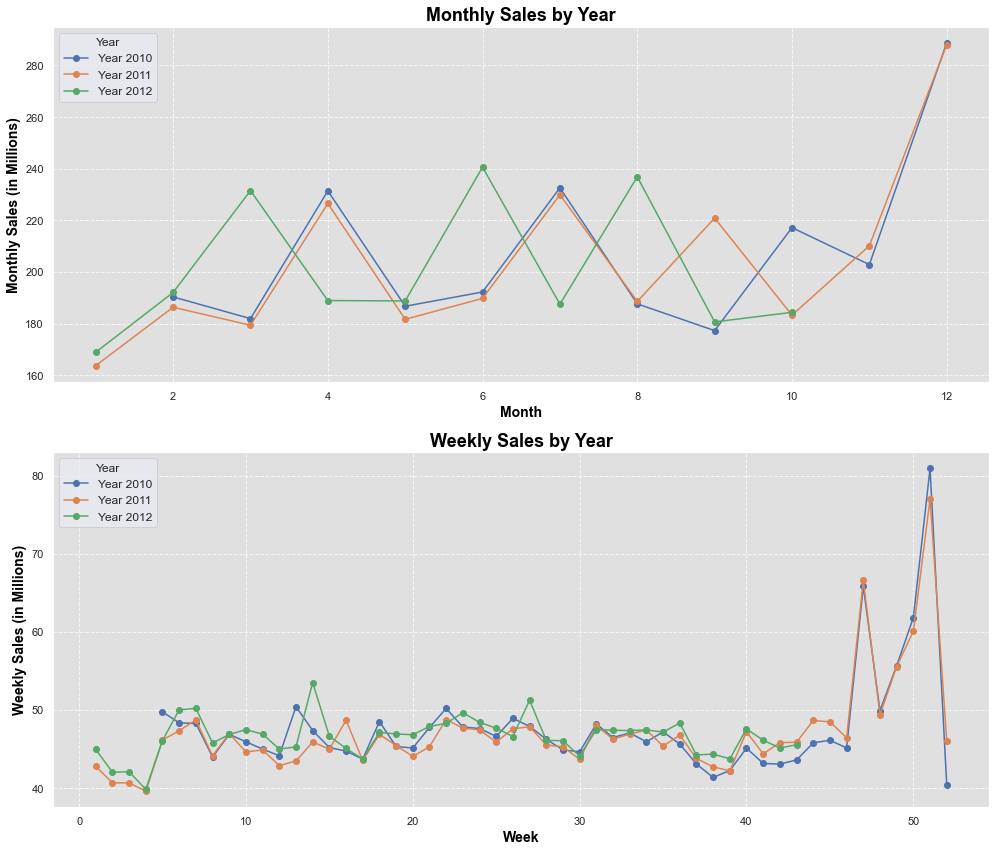

In [18]:

import seaborn as sns

# Seaborn aesthetic settings
sns.set(style="darkgrid")  # Darker background for the plots

# Data preparation
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="month", aggfunc='sum') / 1_000_000  # Scale in millions
weekly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="week", aggfunc='sum') / 1_000_000  # Scale in millions

# Convert data to NumPy
monthly_sales_np = monthly_sales.to_numpy()
weekly_sales_np = weekly_sales.to_numpy()
monthly_index = monthly_sales.index.to_numpy()
weekly_index = weekly_sales.index.to_numpy()

# Line plots
plt.figure(figsize=(14, 12))

# Line plot: Monthly sales
plt.subplot(2, 1, 1)
for i, year in enumerate(monthly_sales.columns):
    plt.plot(monthly_index, monthly_sales_np[:, i], marker='o', linestyle='-', label=f'Year {year}')
plt.title('Monthly Sales by Year', fontsize=18, weight='bold', color='black')
plt.xlabel('Month', fontsize=14, weight='bold', color='black')
plt.ylabel('Monthly Sales (in Millions)', fontsize=14, weight='bold', color='black')  # Added information about the scale
plt.legend(title='Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#e0e0e0')  # Light gray background

# Line plot: Weekly sales
plt.subplot(2, 1, 2)
for i, year in enumerate(weekly_sales.columns):
    plt.plot(weekly_index, weekly_sales_np[:, i], marker='o', linestyle='-', label=f'Year {year}')
plt.title('Weekly Sales by Year', fontsize=18, weight='bold', color='black')
plt.xlabel('Week', fontsize=14, weight='bold', color='black')
plt.ylabel('Weekly Sales (in Millions)', fontsize=14, weight='bold', color='black')  # Added information about the scale
plt.legend(title='Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#e0e0e0')  # Light gray background

plt.tight_layout()
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Dynamic charts 

</div>

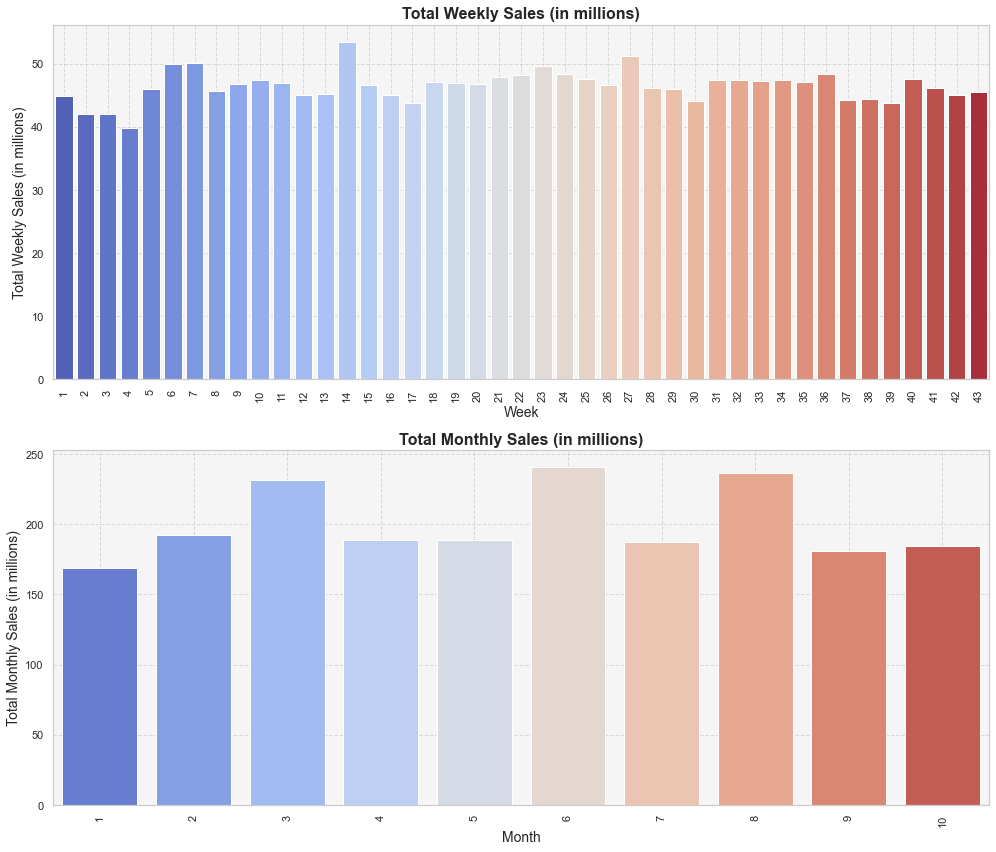

Output()

In [22]:
import ipywidgets as widgets
from IPython.display import display
import warnings  # Import the warnings library

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Seaborn aesthetic settings
sns.set(style="whitegrid")

# Data preparation
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="month", aggfunc='sum')
weekly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="week", aggfunc='sum')

# Convert data to NumPy
monthly_sales_np = monthly_sales.to_numpy()
weekly_sales_np = weekly_sales.to_numpy()
monthly_index = monthly_sales.index.to_numpy()
weekly_index = weekly_sales.index.to_numpy()

# Retrieve unique years from the data
years = df['year'].unique()

# Function to update plots based on the selected time range
def update_plots(selected_years, start_month, end_month, start_week, end_week):
    # Filter data based on selected years
    filtered_df = df[df['year'].isin(selected_years)]
    
    # Prepare new data
    filtered_monthly_sales = pd.pivot_table(filtered_df, values="Weekly_Sales", columns="year", index="month", aggfunc='sum')
    filtered_weekly_sales = pd.pivot_table(filtered_df, values="Weekly_Sales", columns="year", index="week", aggfunc='sum')

    # Apply filters
    if start_month and end_month:
        filtered_monthly_sales = filtered_monthly_sales.loc[start_month:end_month]
    
    if start_week and end_week:
        filtered_weekly_sales = filtered_weekly_sales.loc[start_week:end_week]

    # Convert values to millions
    filtered_weekly_sales /= 1_000_000
    filtered_monthly_sales /= 1_000_000

    # Create the plots
    plt.figure(figsize=(14, 12))

    # Bar chart: Weekly sales
    plt.subplot(2, 1, 1)
    total_weekly_sales = filtered_weekly_sales.sum(axis=1).to_numpy()
    sns.barplot(x=filtered_weekly_sales.index, y=total_weekly_sales, palette="coolwarm", hue=None, legend=False)  # Corrected hue parameter
    plt.title('Total Weekly Sales (in millions)', fontsize=16, weight='bold')
    plt.xlabel('Week', fontsize=14)
    plt.ylabel('Total Weekly Sales (in millions)', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().set_facecolor('#f5f5f5')  # Light gray background

    # Bar chart: Monthly sales
    plt.subplot(2, 1, 2)
    total_monthly_sales = filtered_monthly_sales.sum(axis=1).to_numpy()
    sns.barplot(x=filtered_monthly_sales.index, y=total_monthly_sales, palette="coolwarm", hue=None, legend=False)  # Corrected hue parameter
    plt.title('Total Monthly Sales (in millions)', fontsize=16, weight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Total Monthly Sales (in millions)', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().set_facecolor('#f5f5f5')  # Light gray background

    plt.tight_layout()
    plt.show()

# Widget for selecting years (multiple selection)
year_widget = widgets.SelectMultiple(
    options=sorted(years),
    value=[years.max()],  # Default to the latest year
    description='Years:',
    disabled=False
)

# Sliders for selecting time range
start_month_widget = widgets.IntSlider(
    min=monthly_index.min(),
    max=monthly_index.max(),
    value=monthly_index.min(),
    description='Start Month:',
    continuous_update=False
)

end_month_widget = widgets.IntSlider(
    min=monthly_index.min(),
    max=monthly_index.max(),
    value=monthly_index.max(),
    description='End Month:',
    continuous_update=False
)

start_week_widget = widgets.IntSlider(
    min=weekly_index.min(),
    max=weekly_index.max(),
    value=weekly_index.min(),
    description='Start Week:',
    continuous_update=False
)

end_week_widget = widgets.IntSlider(
    min=weekly_index.min(),
    max=weekly_index.max(),
    value=weekly_index.max(),
    description='End Week:',
    continuous_update=False
)

# Function to update plots based on selected values
def update_view(selected_years, start_month, end_month, start_week, end_week):
    update_plots(selected_years, start_month, end_month, start_week, end_week)

# Create widgets
ui = widgets.VBox([
    year_widget,
    widgets.HBox([start_month_widget, end_month_widget]),
    widgets.HBox([start_week_widget, end_week_widget])
])

# Interactive widget
out = widgets.interactive_output(update_view, {
    'selected_years': year_widget,
    'start_month': start_month_widget,
    'end_month': end_month_widget,
    'start_week': start_week_widget,
    'end_week': end_week_widget
})

display(ui, out)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## Dynamic statistics

</div>

In [23]:

# Data preparation
df["Date"] = pd.to_datetime(df["Date"])
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Function to update the table based on selected filters
def update_table(time_period, year=None, month=None, week=None):
    filtered_df = df.copy()
    
    if time_period == 'year' and year is not None:
        filtered_df = filtered_df[filtered_df['year'] == year]
    elif time_period == 'month' and month is not None:
        filtered_df = filtered_df[filtered_df['month'] == month]
    elif time_period == 'week' and week is not None:
        filtered_df = filtered_df[filtered_df['week'] == week]

    # Group and summarize data
    table = filtered_df.groupby(['year', 'month', 'week'])['Weekly_Sales'].agg(['mean', 'sum', 'count']).reset_index()
    display(table)

# Interactive widgets
time_period_widget = widgets.Dropdown(
    options=['year', 'month', 'week'],
    value='year',
    description='Time Period:',
)

year_widget = widgets.Dropdown(
    options=[None] + [year for year in df['year'].unique()],
    value=None,
    description='Year:',
)

month_widget = widgets.Dropdown(
    options=[None] + [month for month in df['month'].unique()],
    value=None,
    description='Month:',
)

week_widget = widgets.Dropdown(
    options=[None] + [week for week in df['week'].unique()],
    value=None,
    description='Week:',
)

# Function to update the interactive table
def update_interactive_table(time_period, year, month, week):
    update_table(time_period, year, month, week)

# Displaying widgets and table
widgets.interactive(update_interactive_table, 
                    time_period=time_period_widget, 
                    year=year_widget, 
                    month=month_widget, 
                    week=week_widget)


year  month  week          mean          sum  count
0    2010      2     5  16876.145176  49750875.98   2948
1    2010      2     6  16390.912208  48336800.10   2949
2    2010      2     7  16249.714685  48277902.33   2971
3    2010      2     8  14940.686595  43970440.65   2943
4    2010      3     9  15964.821240  46872715.16   2936
..    ...    ...   ...           ...          ...    ...
138  2012      9    39  14815.621125  43735713.56   2952
139  2012     10    40  16032.036903  47567053.49   2967
140  2012     10    41  15484.696200  46128909.98   2979
141  2012     10    42  15311.314544  45122443.96   2947
142  2012     10    43  15433.541013  45544379.53   2951

[143 rows x 6 columns]

interactive(children=(Dropdown(description='Time Period:', options=('year', 'month', 'week'), value='year'), D…

<div style="background-color: #F9F9F9; padding: 10px; border-radius: 5px;">
    <h3>Mean and sum explanation</h3>
    <p>If you have multiple sales records for a given week (e.g., sales from different stores, departments, or products), the <strong>sum</strong> will be the total sales across all those records.</p>
    
  On the other hand, the <strong>mean</strong> is the average sales per record. This means that if there are, for example, 3,000 sales records for a week, the average (<strong>mean</strong>) will be approximately 3,000 times smaller than the total (<strong>sum</strong>).
    
<h3>Why is the mean smaller than the sum?</h3>
    
In your case, the mean is on the order of tens of thousands, while the sum is in the millions, because the mean represents the average sales for a single record (e.g., per store or product), not the total weekly sales.</p>
    
<strong>Example:</strong><br>
    For week 5 in the year 2010:<br>
    - <strong>count</strong> (number of records) is 2,948,<br>
    - <strong>sum</strong> is 49,750,875.98,<br>
    - therefore, <strong>mean</strong> is 16,876.14, calculated as:
    
 
mean = sum / count = 49,750,875.98 / 2,948 ≈ 16,876.14
    </pre>
    
  In summary: <strong>sum</strong> is the total sales for a given period, while <strong>mean</strong> is the average sales per individual record during that period.
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 5. Holidays and seasonality!!

</div>

In [24]:


# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# List of holiday dates
holiday_dates = pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10',
                                 '2010-09-10', '2011-09-09', '2012-09-07',
                                 '2010-11-26', '2011-11-25',
                                 '2010-12-31', '2011-12-30'], format='%Y-%m-%d')

# Add 'IsHoliday' column based on the presence of the date in the holiday list
df['IsHoliday'] = df['Date'].isin(holiday_dates)



In [25]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 




<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.1 Comparing average weekly sales when holiday or not

</div>

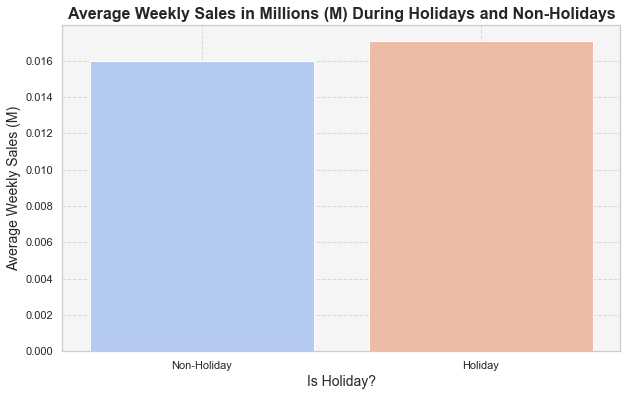

In [26]:

# Calculate the average weekly sales for holidays and non-holidays
average_sales_holiday = df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

# Convert to millions (M) for better understanding of results
average_sales_holiday['Weekly_Sales'] /= 1_000_000

# Set Seaborn aesthetics
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=average_sales_holiday, palette="coolwarm")
plt.title('Average Weekly Sales in Millions (M) During Holidays and Non-Holidays', fontsize=16, weight='bold')
plt.xlabel('Is Holiday?', fontsize=14)
plt.ylabel('Average Weekly Sales (M)', fontsize=14)
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])  # Label the x-axis for better understanding
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')  # Light gray background

plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.2 Events naming
</div>

In [27]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Add a 'Year' column extracted from 'Date'
df['year'] = df['Date'].dt.year
# Add a 'Week_Number' column extracted from 'Date'
df['week'] = df['Date'].dt.isocalendar().week


# List of dates for different types of holidays
super_bowl_dates = pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10'], format='%Y-%m-%d')
labor_day_dates = pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07'], format='%Y-%m-%d')
thanksgiving_dates = pd.to_datetime(['2010-11-26', '2011-11-25'], format='%Y-%m-%d')
christmas_dates = pd.to_datetime(['2010-12-31', '2011-12-30'], format='%Y-%m-%d')

# Create columns for different types of holidays
df['Super_Bowl'] = df['Date'].isin(super_bowl_dates)
df['Labor_Day'] = df['Date'].isin(labor_day_dates)
df['Thanksgiving'] = df['Date'].isin(thanksgiving_dates)
df['Christmas'] = df['Date'].isin(christmas_dates)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.3 Number of week connected to event

</div>

In [28]:
from datetime import datetime

# Sample data - update holidays according to your case
holidays = {
    'Super_Bowl': ['2010-02-12', '2011-02-11', '2012-02-10'],
    'Labor_Day': ['2010-09-10', '2011-09-09', '2012-09-07'],
    'Thanksgiving': ['2010-11-26', '2011-11-25'],
    'Christmas': ['2010-12-31', '2011-12-30']
}

# Function to calculate the week of the year for a given date
def get_week_of_year(date_str):
    # Convert the date from string format to a datetime object
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    # Calculate the week number of the year
    return date_obj.isocalendar()[1]

# Calculating the week of the year for each holiday
for holiday, dates in holidays.items():
    print(f"{holiday}:")
    for date in dates:
        week_number = get_week_of_year(date)
        print(f"  {date} -> Week {week_number}")


Super_Bowl:
  2010-02-12 -> Week 6
  2011-02-11 -> Week 6
  2012-02-10 -> Week 6
Labor_Day:
  2010-09-10 -> Week 36
  2011-09-09 -> Week 36
  2012-09-07 -> Week 36
Thanksgiving:
  2010-11-26 -> Week 47
  2011-11-25 -> Week 47
Christmas:
  2010-12-31 -> Week 52
  2011-12-30 -> Week 52


In [29]:
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  ...  Unemployment  Type    Size  month  \
0        0.0        0.0        0.0  ...         8.106     A  151315      2   
1        0.0        0.0        0.0  ...         8.106     A  151315      2   
2        0.0        0.0        0.0  ...         8.106     A  151315      2   
3        0.0        0.0        0.0  ...         8.106     A  151315      2   
4        0.0        0.0        0.0  ...         8.106     A  151315      3   

   year  week  Super_Bowl  Labor_Day  Thanksgiving  Christmas  
0  2010     5       False      False         False      False  
1  2010     6        True      False         False      False  
2  2010     7       False      False         False      False  
3  2010     8       False      False         False      False  
4  2010     9       False      False         False      False  

[5 rows x 23 columns]

In [30]:
# Range of weeks for each holiday
holiday_windows = {
    'Super_Bowl': {'weeks': [4, 5, 6]},
    'Labor_Day': {'weeks': [35, 36]},
    'Thanksgiving': {'weeks': [46, 47]},
    'Christmas': {'weeks': [49, 50, 51, 52]}
}

# Function to create a new DataFrame with data for specified weeks and years, grouped by 'Type'
def filter_and_sum_sales_by_holidays_and_type(df, years):
    filtered_data = []

    # Iterating through years
    for year in years:
        df_year = df[df['year'] == year]
        
        for holiday, info in holiday_windows.items():
            weeks = info['weeks']
            df_filtered = df_year[df_year['week'].isin(weeks)]

            for week in weeks:
                week_data = df_filtered[df_filtered['week'] == week]
                if not week_data.empty:
                    # Grouping by 'Type' and summing sales
                    sales_by_type = week_data.groupby('Type')['Weekly_Sales'].sum()
                    for type_, total_sales in sales_by_type.items():
                        filtered_data.append({
                            'year': year,
                            'week': week,
                            'Weekly_Sales': total_sales,
                            'Event': holiday,
                            'Type': type_
                        })
    
    return pd.DataFrame(filtered_data)

# Example usage

# Filtering data and summing sales for the years 2010, 2011, 2012
years = [2010, 2011, 2012]
filtered_df = filter_and_sum_sales_by_holidays_and_type(df, years)

# Displaying the results
filtered_df


year  week  Weekly_Sales       Event Type
0   2010     5   32144231.25  Super_Bowl    A
1   2010     5   14775516.11  Super_Bowl    B
2   2010     5    2831128.62  Super_Bowl    C
3   2010     6   30982620.79  Super_Bowl    A
4   2010     6   14439248.06  Super_Bowl    B
..   ...   ...           ...         ...  ...
73  2012    35   14064072.54   Labor_Day    B
74  2012    35    2839774.10   Labor_Day    C
75  2012    36   31179820.25   Labor_Day    A
76  2012    36   14079993.19   Labor_Day    B
77  2012    36    3070635.59   Labor_Day    C

[78 rows x 5 columns]

In [31]:
# Adding event column to dataframe
def determine_event(row):
    if row['Super_Bowl']:
        return 'Super_Bowl'
    elif row['Labor_Day']:
        return 'Labor_Day'
    elif row['Thanksgiving']:
        return 'Thanksgiving'
    elif row['Christmas']:
        return 'Christmas'
    else:
        return None  # 

df['Event'] = df.apply(determine_event, axis=1)


print(df[['Date', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas', 'Event']].head())


        Date  Super_Bowl  Labor_Day  Thanksgiving  Christmas       Event
0 2010-02-05       False      False         False      False        None
1 2010-02-12        True      False         False      False  Super_Bowl
2 2010-02-19       False      False         False      False        None
3 2010-02-26       False      False         False      False        None
4 2010-03-05       False      False         False      False        None


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 5.4 Average sales in events weeks/comparing top overall average sales

</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### How to calculate average sales?

</div>

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Range of weeks for each holiday
holiday_windows = {
    'Super_Bowl': {'weeks': [4, 5, 6]},
    'Labor_Day': {'weeks': [35, 36]},
    'Thanksgiving': {'weeks': [46, 47]},
    'Christmas': {'weeks': [49, 50, 51, 52]}
}

def plot_sales_for_year_plotly(df, year):
    # Color list for marking
    colors = {
        'Super_Bowl': 'darkgrey',
        'Labor_Day': 'darkgrey',
        'Thanksgiving': 'darkgrey',
        'Christmas': 'darkgrey'
    }
    
    # Weeks to highlight in red
    highlight_weeks = {6, 36, 47, 51}
    all_highlight_weeks = {4, 5, 6, 35, 36, 46, 47, 49, 50, 51, 52}

    # Filtering the data
    df_year = df[df['year'] == year]
    
    # Calculating averages
    avg_sales_year = df_year['Weekly_Sales'].mean()
    avg_sales_excluding = df_year[~df_year['week'].isin(all_highlight_weeks)]['Weekly_Sales'].mean()


In [33]:
!pip install plotly

^C


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### Average sales in events =>plot

</div>

In [35]:
# Range of weeks for each holiday
holiday_windows = {
    'Super_Bowl': {'weeks': [4, 5, 6]},
    'Labor_Day': {'weeks': [35, 36]},
    'Thanksgiving': {'weeks': [46, 47]},
    'Christmas': {'weeks': [49, 50, 51, 52]}
}

def plot_sales_for_year_plotly(df, year):
    # List of colors for marking
    colors = {
        'Super_Bowl': 'darkgrey',
        'Labor_Day': 'darkgrey',
        'Thanksgiving': 'darkgrey',
        'Christmas': 'darkgrey'
    }
    
    # Weeks to highlight in red
    highlight_weeks = {6, 36, 47, 51}
    all_highlight_weeks = {4, 5, 6, 35, 36, 46, 47, 49, 50, 51, 52}

    # Filter the data
    df_year = df[df['year'] == year]
    
    # Calculate averages
    avg_sales_year = df_year['Weekly_Sales'].mean()
    avg_sales_excluding = df_year[~df_year['week'].isin(all_highlight_weeks)]['Weekly_Sales'].mean()

    # Create subplots - 1 row, 4 columns
    fig = make_subplots(
        rows=1, cols=4,
        subplot_titles=list(holiday_windows.keys()),
        shared_xaxes=True, shared_yaxes=True,
        horizontal_spacing=0.1  # Increase space between subplots
    )
    
    # Draw charts for each holiday
    for i, (event, info) in enumerate(holiday_windows.items()):
        df_event = df[(df['year'] == year) & (df['Event'] == event)]
        
        # Draw bars
        bars = fig.add_trace(
            go.Bar(
                x=df_event['week'].astype(str),
                y=df_event['Weekly_Sales'],
                name=event,
                marker_color=[ 'red' if week in highlight_weeks else colors[event] for week in df_event['week']],
                text=df_event['Weekly_Sales'].apply(lambda x: f'{x / 1e6:.1f}M'),  # Rounded values in millions
                textposition='outside'
            ),
            row=1, col=i + 1
        )
        
        # Draw average line for the entire year (green)
        fig.add_trace(
            go.Scatter(
                x=[df_event['week'].min(), df_event['week'].max()],
                y=[avg_sales_year] * 2,
                mode='lines',
                line=dict(color='green', dash='dash'),
                showlegend=False
            ),
            row=1, col=i + 1
        )

        # Draw average line excluding highlighted weeks (red)
        fig.add_trace(
            go.Scatter(
                x=[df_event['week'].min(), df_event['week'].max()],
                y=[avg_sales_excluding] * 2,
                mode='lines',
                line=dict(color='red', dash='dash'),
                showlegend=False
            ),
            row=1, col=i + 1
        )

    # Axis settings
    fig.update_layout(
        title_text=f'Weekly Sales for Holidays in {year}',
        title_x=0.5,
        xaxis_title='Week',
        yaxis_title='Weekly Sales',
        xaxis_tickangle=-45,
        yaxis=dict(
            tickformat='.0f'  # Formatting numbers without commas
        ),
        height=600,
        width=1800,  # Increased width for better visualization
        showlegend=False  # Hide legend
    )

    fig.show()

# Filter data for the years 2010, 2011, and 2012
years = [2010, 2011, 2012]
for year in years:
    filtered_df_year = filtered_df[filtered_df['year'] == year]
    plot_sales_for_year_plotly(filtered_df_year, year)


  Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 6.Shop Type efects(A/B/C) on holidays

</div>

In [36]:
# Range of weeks for each holiday
holiday_windows = {
    'Super_Bowl': {'weeks': [4, 5, 6]},
    'Labor_Day': {'weeks': [35, 36]},
    'Thanksgiving': {'weeks': [46, 47]},
    'Christmas': {'weeks': [49, 50, 51, 52]}
}

def plot_total_sales_by_holiday(df, year):
    # Filter the data
    df_year = df[df['year'] == year]
    
    # Calculate total sales for each holiday
    total_sales_by_holiday = {}
    
    for event, info in holiday_windows.items():
        weeks = info['weeks']
        df_event = df_year[df_year['week'].isin(weeks)]
        
        # Sum the sales
        total_sales = df_event['Weekly_Sales'].sum()
        total_sales_by_holiday[event] = total_sales
    
    # Create the bar chart
    fig = go.Figure()
    
    fig.add_trace(
        go.Bar(
            x=list(total_sales_by_holiday.keys()),
            y=list(total_sales_by_holiday.values()),
            marker_color='darkgrey',
            text=[f'{value / 1e6:.1f}M' for value in total_sales_by_holiday.values()],
            textposition='outside'
        )
    )

    # Axis settings
    fig.update_layout(
        title_text=f'Total Sales for Holidays in {year}',
        title_x=0.5,
        xaxis_title='Holiday',
        yaxis_title='Total Sales',
        yaxis=dict(
            tickformat='.0f'  # Formatting numbers without commas
        ),
        height=600,
        width=1000,  # Increased width for better visualization
        showlegend=False  # Hide legend
    )

    fig.show()

# Filter data for the years 2010, 2011, and 2012
years = [2010, 2011, 2012]
for year in years:
    filtered_df_year = filtered_df[filtered_df['year'] == year]
    plot_total_sales_by_holiday(filtered_df_year, year)


In [37]:


# Range of weeks for each holiday
holiday_windows = {
    'Super_Bowl': {'weeks': [4, 5, 6]},
    'Labor_Day': {'weeks': [35, 36]},
    'Thanksgiving': {'weeks': [46, 47]},
    'Christmas': {'weeks': [49, 50, 51, 52]}
}

# Colors for store types
type_colors = {
    'A': 'blue',
    'B': 'orange',
    'C': 'green'
}

def plot_total_sales_by_holiday_and_type(df, year):
    # Filter the data
    df_year = df[df['year'] == year]
    
    # Create the bar chart
    fig = go.Figure()
    
    # Add traces for each store type
    for type_, color in type_colors.items():
        # Filter data for the specific store type
        sales_by_holiday = []
        for event, info in holiday_windows.items():
            weeks = info['weeks']
            df_event = df_year[df_year['week'].isin(weeks)]
            sales = df_event[df_event['Type'] == type_]['Weekly_Sales'].sum()
            sales_by_holiday.append(sales)
        
        fig.add_trace(
            go.Bar(
                x=list(holiday_windows.keys()),  # Holidays as X axes
                y=sales_by_holiday,
                name=f'Type {type_}',  # Store type as name
                marker_color=color,  # Color for store type
                text=[f'{value / 1e6:.1f}M' for value in sales_by_holiday],
                textposition='outside'
            )
        )
    
    # Axis settings
    fig.update_layout(
        title_text=f'Total Sales by Holiday and Store Type in {year}',
        title_x=0.5,
        xaxis_title='Holiday',
        yaxis_title='Total Sales',
        barmode='stack',  # Set bars to stack
        yaxis=dict(
            tickformat='.0f'  # Formatting numbers without commas
        ),
        height=600,
        width=1000,  # Increased width for better visualization
        showlegend=True  # Show legend
    )
    
    fig.show()

# Filter data for the years 2010, 2011, and 2012
years = [2010, 2011, 2012]
for year in years:
    filtered_df_year = filtered_df[filtered_df['year'] == year]
    plot_total_sales_by_holiday_and_type(filtered_df_year, year)


In [38]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
95373      10    72 2010-11-26     693099.36       True        55.33   
338013     35    72 2011-11-25     649770.18       True        47.88   
95425      10    72 2011-11-25     630999.19       True        60.68   
337961     35    72 2010-11-26     627962.93       True        46.67   
135665     14    72 2010-11-26     474330.10       True        46.15   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  Type    Size  month  \
95373        3.162       0.00        0.0       0.00  ...     B  126512     11   
338013       3.492    1333.24        0.0   58563.24  ...     B  103681     11   
95425        3.760     174.72      329.0  141630.61  ...     B  126512     11   
337961       3.039       0.00        0.0       0.00  ...     B  103681     11   
135665       3.039       0.00        0.0       0.00  ...     A  200898     11   

        year week  Super_Bowl  Labor_Day  Thanksgiving  Christmas  \
95373   2010   47       False      False          True      False   
338013  2011   47       False      False          True      False   
95425   2011   47       False      False          True      False   
337961  2010   47       False      False          True      False   
135665  2010   47       False      False          True      False   

               Event  
95373   Thanksgiving  
338013  Thanksgiving  
95425   Thanksgiving  
337961  Thanksgiving  
135665  Thanksgiving  

[5 rows x 24 columns]

<div style="background-color: #f9f9f9; padding: 15px; border-radius: 5px;">
    <p>
        It is evident from the graph that the highest average sales occur during the Thanksgiving week, which is situated between the holidays. Additionally, for all holidays, Type A stores demonstrate the highest sales. It is also not surprising that the top 5 highest weekly sales belong to the Thanksgiving weeks.
    </p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 7. Size-type relation

</div>

In [39]:
df_stores.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

count       mean       std      min        25%       50%       75%  \
Type                                                                       
A      22.0  177247.73  49392.62  39690.0  155840.75  202406.0  203819.0   
B      17.0  101190.71  32371.14  34875.0   93188.00  114533.0  123737.0   
C       6.0   40541.67   1304.15  39690.0   39745.00   39910.0   40774.0   

           max  
Type            
A     219622.0  
B     140167.0  
C      42988.0

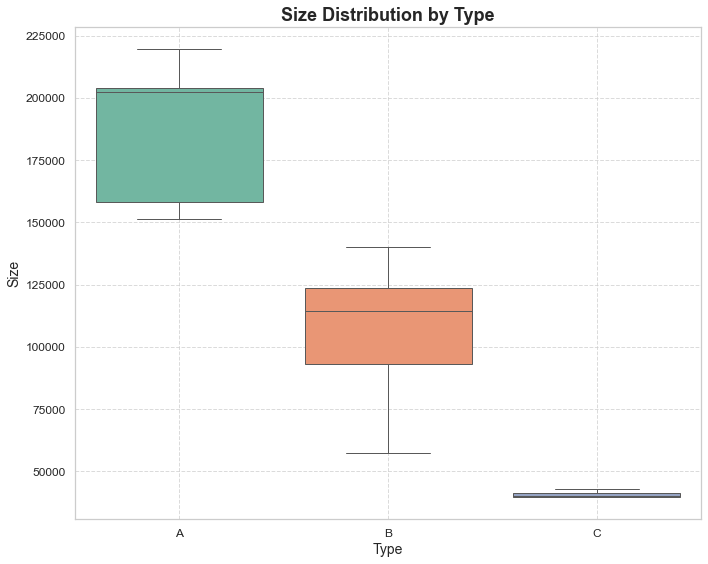

In [40]:

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(10, 8))

# Create the boxplot
sns.boxplot(x='Type', y='Size', data=df, showfliers=False, palette='Set2')

# Add title and labels
plt.title('Size Distribution by Type', fontsize=18, weight='bold')
plt.xlabel('Type', fontsize=14)
plt.ylabel('Size', fontsize=14)

# Customize the font and tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


<div style="background-color: #f9f9f9; padding: 15px; border-radius: 5px;">
    <p>
        The size of the types of stores is consistent with sales, as expected. Larger stores have higher sales. Additionally, Walmart classifies stores according to their sizes as shown in the graph. After the smallest size value of Type A, Type B begins. Following the smallest size value of Type B, Type C begins.
    </p>
</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 8.Markdown columns
</div>

In [41]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment         0
Type                 0
Size                 0
month                0
year                 0
week                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
Event           390722
dtype: int64

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 8.1 Comparing sales in days with discounts(markdowns) and without them
</div>

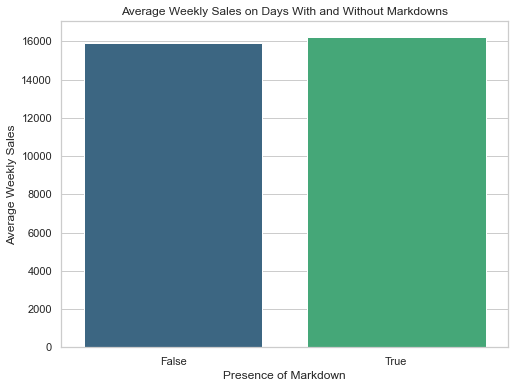

In [42]:
# Create a new column that indicates whether there are markdowns
df['Has_Markdown'] = df[['MarkDown1', 'MarkDown2', 'MarkDown3']].sum(axis=1) > 0

# Calculate the average weekly sales for days with and without markdowns
average_sales = df.groupby('Has_Markdown')['Weekly_Sales'].mean().reset_index()

# Visualization settings
plt.figure(figsize=(8, 6))
sns.barplot(x='Has_Markdown', y='Weekly_Sales', data=average_sales, palette='viridis')

# Add title and labels
plt.title('Average Weekly Sales on Days With and Without Markdowns')
plt.xlabel('Presence of Markdown')
plt.ylabel('Average Weekly Sales')

# Show the plot
plt.show()


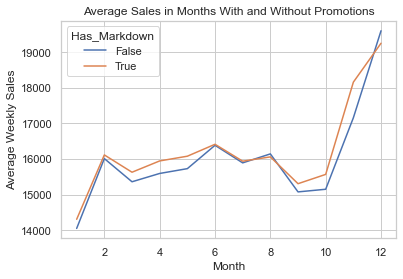

In [43]:
# Comparison of average sales in months with and without promotions
monthly_sales = df.groupby(['month', 'Has_Markdown'])['Weekly_Sales'].mean().unstack()
monthly_sales.plot()
plt.title('Average Sales in Months With and Without Promotions')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 8.2 Markdown/sales correlation
</div>

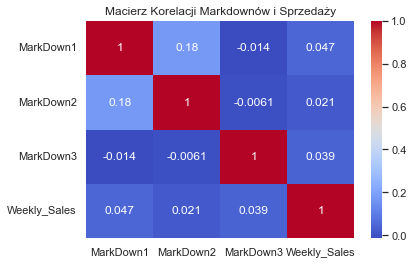

In [44]:
# Markdown/sales correlation
correlation_matrix = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'Weekly_Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz Korelacji Markdownów i Sprzedaży')
plt.show()


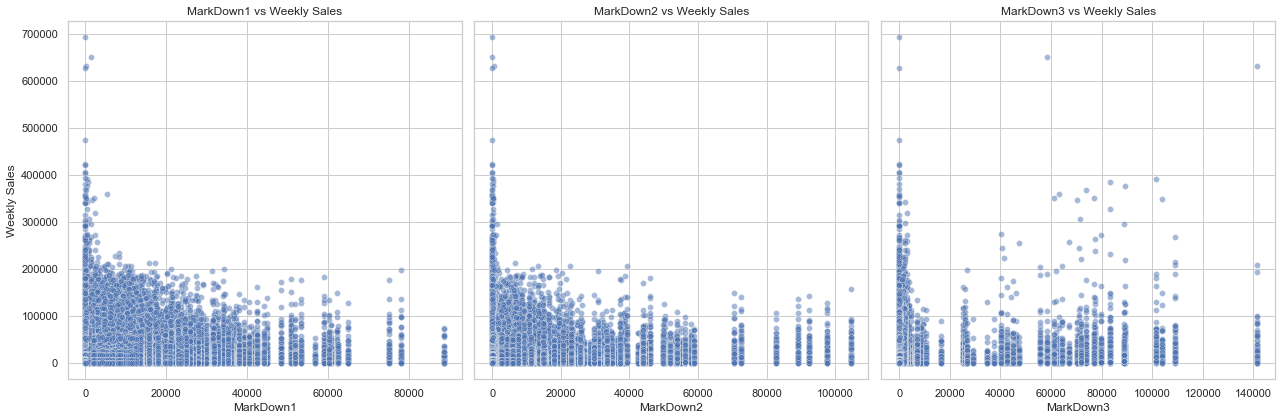

In [45]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for MarkDown1
sns.scatterplot(x='MarkDown1', y='Weekly_Sales', data=df, ax=axes[0], alpha=0.5)
axes[0].set_title('MarkDown1 vs Weekly Sales')
axes[0].set_xlabel('MarkDown1')
axes[0].set_ylabel('Weekly Sales')

# Plot for MarkDown2
sns.scatterplot(x='MarkDown2', y='Weekly_Sales', data=df, ax=axes[1], alpha=0.5)
axes[1].set_title('MarkDown2 vs Weekly Sales')
axes[1].set_xlabel('MarkDown2')

# Plot for MarkDown3
sns.scatterplot(x='MarkDown3', y='Weekly_Sales', data=df, ax=axes[2], alpha=0.5)
axes[2].set_title('MarkDown3 vs Weekly Sales')
axes[2].set_xlabel('MarkDown3')

# Adjust layout
plt.tight_layout()
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f9f9f9;
            padding: 20px;
        }
        .summary {
            background-color: #ffffff;
            padding: 15px;
            border-radius: 5px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
        }
        h2 {
            color: #333;
        }
    </style>
</head>
<body>
    <div class="summary">
        <h2>Summary of Findings</h2>
        <p>
            The low correlation between markdowns and weekly sales suggests that markdowns may not significantly impact sales due to various factors:
        </p>
        <ol>
            <li><strong>Wide Range of Influencing Factors:</strong> Sales are influenced by seasonality, location, competition, and market trends.</li>
            <li><strong>Ineffective Promotions:</strong> Markdown amounts may be too low to attract additional customers.</li>
            <li><strong>Poor Marketing Effectiveness:</strong> Customers may not be adequately informed about markdowns.</li>
            <li><strong>Interactions Between Markdown Types:</strong> Different markdowns might interact in complex ways affecting overall sales.</li>
            <li><strong>Data Limitations:</strong> Incomplete data could lead to an inaccurate understanding of markdown impacts.</li>
        </ol>
        <p>
            Overall, the absence of clear correlations indicates that further analysis, including additional variables, is necessary to understand markdown effects on sales.
        </p>
    </div>
</body>
</html>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 9. Weekly sales Anomalies
</div>

In [46]:
df.describe() # to see weird statistical things

Store           Dept                           Date  \
count  420285.000000  420285.000000                         420285   
mean       22.195477      44.242771  2011-06-18 07:22:30.395088640   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.787213      30.507197                            NaN   

        Weekly_Sales    Temperature     Fuel_Price      MarkDown1  \
count  420285.000000  420285.000000  420285.000000  420285.000000   
mean    16030.329773      60.090474       3.360888    2590.187246   
min         0.000000      -2.060000       2.472000       0.000000   
25%      2117.560000      46.680000       2.933000       0.000000   
50%      7659.090000      62.090000       3.452000       0.000000   
75%     20268.380000      74.280000       3.738000    2801.500000   
max    693099.360000     100.140000       4.468000   88646.760000   
std     22728.500149      18.448260       0.458523    6053.225499   

           MarkDown2      MarkDown3      MarkDown4      MarkDown5  \
count  420285.000000  420285.000000  420285.000000  420285.000000   
mean      878.898468     468.776513    1083.462694    1662.706138   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         2.400000       4.540000     425.290000    2168.040000   
max    104519.540000  141630.610000   67474.850000  108519.280000   
std      5076.506949    5533.592652    3895.801513    4205.946641   

                 CPI   Unemployment           Size          month  \
count  420285.000000  420285.000000  420285.000000  420285.000000   
mean      171.212152       7.960077  136749.569176       6.449709   
min       126.064000       3.879000   34875.000000       1.000000   
25%       132.022667       6.891000   93638.000000       4.000000   
50%       182.350989       7.866000  140167.000000       6.000000   
75%       212.445487       8.567000  202505.000000       9.000000   
max       227.232807      14.313000  219622.000000      12.000000   
std        39.162280       1.863873   60992.688568       3.243394   

                year       week  
count  420285.000000   420285.0  
mean     2010.968443  25.827729  
min      2010.000000        1.0  
25%      2010.000000       14.0  
50%      2011.000000       26.0  
75%      2012.000000       38.0  
max      2012.000000       52.0  
std         0.796893  14.152442

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 9.1 Weekly sales distribution
</div>

Data type in df['Weekly_Sales']: <class 'numpy.float64'>
Sample values in df['Weekly_Sales']:
 0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64


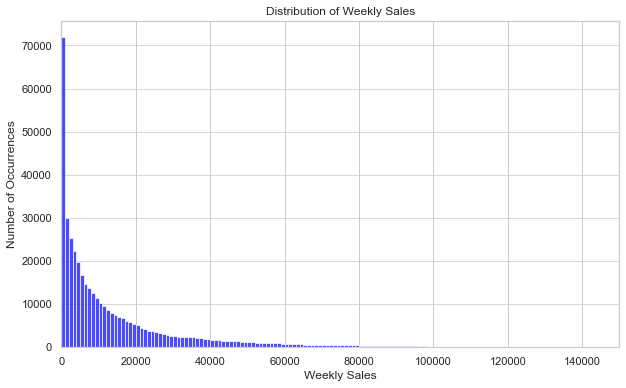

In [47]:
import numpy as np  
# Check the data type and sample values
print("Data type in df['Weekly_Sales']:", type(df['Weekly_Sales'].iloc[0]))
print("Sample values in df['Weekly_Sales']:\n", df['Weekly_Sales'].head())

# If the values are lists, tuples, or other structures, convert them to a one-dimensional structure
df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: x[0] if isinstance(x, (list, tuple, np.ndarray)) else x)

# Convert the column to a numeric type, ignoring errors, and into a numpy array
weekly_sales_array = pd.to_numeric(df['Weekly_Sales'], errors='coerce').values

# Remove NaN values
weekly_sales_array = weekly_sales_array[~np.isnan(weekly_sales_array)]

# Determine the maximum value in the data
max_value = int(weekly_sales_array.max())

# Set the bins in increments of 1000 units
bins = np.arange(0, max_value + 1000, 1000)

# Display the histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(weekly_sales_array, bins=bins, color='blue', alpha=0.7)

# Set the X-axis range (example here, adjust as needed)
plt.xlim(0, 150000)  # Change the range according to your data

plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Number of Occurrences')
plt.grid(axis='y', alpha=0.75)
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 9.2 How big is anomaly problem?
</div>

In [48]:
# Grouping the data by store, week, and department to calculate the average weekly sales
grouped = df.groupby(['Store', 'week', 'Dept'])['Weekly_Sales'].mean().reset_index()
grouped.rename(columns={'Weekly_Sales': 'Average_Weekly_Sales'}, inplace=True)

# Merging the average values back into the original data
df = df.merge(grouped, on=['Store', 'week', 'Dept'], suffixes=('', '_avg'))

# Setting a threshold to detect anomalies
# For example, if the sales are less than 10% of the average value
df['Anomaly'] = df['Weekly_Sales'] < 0.2 * df['Average_Weekly_Sales']

# Filtering the anomalies
anomalies = df[df['Anomaly']]

# Displaying the results
print("Number of detected anomalies:", anomalies.shape[0])
print(anomalies[['Store', 'Dept', 'Date', 'Weekly_Sales', 'Average_Weekly_Sales']])



Number of detected anomalies: 3611
        Store  Dept       Date  Weekly_Sales  Average_Weekly_Sales
2297        1    18 2010-04-16        584.56           3341.603333
2298        1    18 2010-04-23         65.24           4498.146667
2299        1    18 2010-05-14          0.50             77.440000
2301        1    18 2010-06-11          0.15              2.040000
2302        1    18 2010-08-20          1.00              5.485000
...       ...   ...        ...           ...                   ...
420181     45    98 2010-11-05         40.48            394.830000
420182     45    98 2010-11-12         59.46            478.340000
420191     45    98 2011-01-14         42.00            359.855000
420192     45    98 2011-01-21          2.00            425.420000
420194     45    98 2011-02-04         57.25            392.330000

[3611 rows x 5 columns]


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 9.3 Store/Anomaly count
</div>

In [49]:

# Grouping data by store and week to calculate average weekly sales
grouped = df.groupby(['Store', 'week'])['Weekly_Sales'].mean().reset_index()
grouped.rename(columns={'Weekly_Sales': 'Average_Weekly_Sales'}, inplace=True)

# Merging average values with the original data
df = df.merge(grouped, on=['Store', 'week'], suffixes=('', '_avg'))

# Setting a threshold for anomaly detection
# Example: if sales are less than 20% of the average value
df['Anomaly'] = df['Weekly_Sales'] < 0.2 * df['Average_Weekly_Sales']

# Filtering anomalies
anomalies = df[df['Anomaly']]

# Grouping anomalies by store
anomalies_by_store = anomalies.groupby('Store').size().reset_index(name='Anomaly_Count')

# Sorting by the number of anomalies in descending order
anomalies_by_store_sorted = anomalies_by_store.sort_values(by='Anomaly_Count', ascending=False)

# Displaying stores with the highest number of anomalies
print(anomalies_by_store_sorted.head(40))  # Stores with the highest number of anomalies


    Store  Anomaly_Count
17     18            202
15     16            164
24     25            162
34     35            154
42     43            142
29     30            141
22     23            135
44     45            115
6       7            114
13     14            110
21     22            105
35     36            103
28     29             93
32     33             91
33     34             89
9      10             86
20     21             84
2       3             83
11     12             81
26     27             74
41     42             71
38     39             67
8       9             66
10     11             66
16     17             63
14     15             61
39     40             61
19     20             60
37     38             59
43     44             56
31     32             56
1       2             54
30     31             54
36     37             49
4       5             46
23     24             46
27     28             44
3       4             42
5       6             42


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 9.4 Solution
</div>

<div style="background-color: #f9f9f9; padding: 15px; border-radius: 5px;">
    <p>We replace values below the 15th percentile to handle anomalies in weekly sales data. This helps remove extreme low values that might be errors or rare events, making the dataset more reliable. By using the 15th percentile, we adjust only the outliers, while keeping most of the data unchanged. This method ensures that the overall distribution of the data remains realistic.</p>
    <p>We use the percentile approach instead of normalization because normalization changes the scale of all data points, which can distort important trends. Percentiles focus only on the problematic values, preserving the original data's structure.</p>
</div>


In [50]:




# Calculating the 15th percentile of sales values
percentile_15 = np.percentile(df['Weekly_Sales'], 15)

# Replacing values lower than the 15th percentile with the 15th percentile value
df.loc[df['Weekly_Sales'] < percentile_15, 'Weekly_Sales'] = percentile_15

# Displaying the first few rows after the replacement
print(df[['Store', 'Dept', 'Date', 'Weekly_Sales', 'Average_Weekly_Sales']].head())




   Store  Dept       Date  Weekly_Sales  Average_Weekly_Sales
0      1     1 2010-02-05      24924.50          23366.916667
1      1     1 2010-02-12      46039.49          40305.050000
2      1     1 2010-02-19      41595.55          47500.506667
3      1     1 2010-02-26      19403.54          19630.530000
4      1     1 2010-03-05      21827.90          20756.180000


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 9.5 Results
</div>

In [51]:



# Grouping data by store, week, and department to calculate average weekly sales
grouped = df.groupby(['Store', 'week', 'Dept'])['Weekly_Sales'].mean().reset_index()
grouped.rename(columns={'Weekly_Sales': 'Average_Weekly_Sales'}, inplace=True)

# Merging average values with the original data
df = df.merge(grouped, on=['Store', 'week', 'Dept'], suffixes=('', '_avg'))

# Setting a threshold for anomaly detection
# Example: if sales are less than 10% of the average value
df['Anomaly'] = df['Weekly_Sales'] < 0.2 * df['Average_Weekly_Sales']

# Filtering anomalies
anomalies = df[df['Anomaly']]

# Displaying the results
print("Number of detected anomalies:", anomalies.shape[0])
print(anomalies[['Store', 'Dept', 'Date', 'Weekly_Sales', 'Average_Weekly_Sales']])


Number of detected anomalies: 136
        Store  Dept       Date  Weekly_Sales  Average_Weekly_Sales
2298        1    18 2010-04-23       754.648           4498.146667
2381        1    18 2012-04-20       754.648           4498.146667
2382        1    18 2012-04-27       754.648           3996.550000
9784        1    96 2010-07-02      5265.090          28427.840000
12527       2    18 2010-04-16       754.648           5382.346667
...       ...   ...        ...           ...                   ...
336303     35    58 2011-09-02       775.000           3889.333333
362287     39    18 2010-04-16       754.648           4549.236667
362288     39    18 2010-04-23       754.648           7026.603333
362379     39    18 2012-04-20       754.648           7026.603333
419729     45    94 2010-02-19       754.648           4382.063333

[136 rows x 5 columns]


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 10. Department Analysis
</div>

In [53]:
import plotly.express as px
import pandas as pd

# Calculating average weekly sales for each department
average_sales_per_dept = df.groupby('Dept')['Weekly_Sales'].mean().reset_index()

# Setting column names
average_sales_per_dept.columns = ['Dept', 'Average_Weekly_Sales']

# Creating a bar chart in Plotly
fig = px.bar(
    average_sales_per_dept,
    x='Dept',
    y='Average_Weekly_Sales',
    title='Average Weekly Sales by Department',
    labels={'Dept': 'Departments', 'Average_Weekly_Sales': 'Average Weekly Sales'},
    color='Average_Weekly_Sales',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Customizing the chart appearance
fig.update_layout(
    xaxis_title='Departments',
    yaxis_title='Average Weekly Sales',
    xaxis_tickangle=-45,  # Rotating labels on the X-axis
    width=1000,  # Chart width
    height=600,  # Chart height
    template='plotly_white'  # Chart style
)

# Show the chart
fig.show()


<div style="background-color: #f9f9f9; padding: 15px; border-radius: 5px;">
    <p>From the first graph, it is seen that one department between 60-80 (I assume it is 72) has higher sales values. But, when we take the averages, it is seen that department 92 has higher mean sales.</p>
    <p>Department 72 is a seasonal department, I think. It has higher values in some seasons, but on average, department 92 shows higher overall sales.</p>
</div>


In [54]:
import plotly.express as px


# Calculating average weekly sales for each store
average_sales_per_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Setting column names
average_sales_per_store.columns = ['Store', 'Average_Weekly_Sales']

# Creating a bar chart in Plotly
fig = px.bar(
    average_sales_per_store,
    x='Store',
    y='Average_Weekly_Sales',
    title='Average Weekly Sales by Store',
    labels={'Store': 'Store', 'Average_Weekly_Sales': 'Average Weekly Sales'},
    color='Average_Weekly_Sales',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Customizing the chart appearance
fig.update_layout(
    xaxis_title='Store',
    yaxis_title='Average Weekly Sales',
    xaxis_tickangle=-45,  # Rotating labels on the X-axis
    width=1200,  # Chart width
    height=600,  # Chart height
    template='plotly_white'  # Chart style
)

# Show the chart
fig.show()


    Store                                               Dept  \
0       1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1       2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2       3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3       4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4       5  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
5       6  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6       7  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7       8  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
8       9  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
9      10  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
10     11  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
11     12  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
12     13  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
13     14  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
14     15  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1

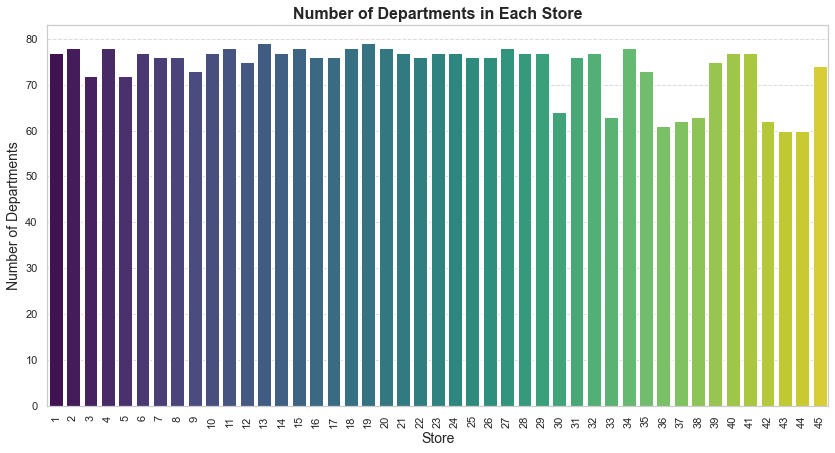

In [55]:


# Remove the column with duplicates (if unnecessary)
df = df.loc[:, ~df.columns.duplicated()]

# Alternatively, rename the column if it's needed
df = df.rename(columns={'Average_Weekly_Sales_avg': 'Average_Weekly_Sales_new'})

# 1. Grouping and Counting: How many departments are in each store?
stores_departments = df.explode('Store').groupby('Store')['Dept'].apply(list).reset_index()

# Adding a column that counts unique departments in each store
stores_departments['Number of Departments'] = stores_departments['Dept'].apply(lambda x: len(set(x)))

# Displaying the results as a table
print(stores_departments)

# Bar chart: number of departments in each store
plt.figure(figsize=(14, 7))
sns.barplot(data=stores_departments, x='Store', y='Number of Departments', palette='viridis')
plt.title('Number of Departments in Each Store', fontsize=16, weight='bold')
plt.xlabel('Store', fontsize=14)
plt.ylabel('Number of Departments', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.show()


    Dept  Unique_Stores_Count
0      1                   45
1      2                   45
2      3                   45
3      4                   45
4      5                   45
..   ...                  ...
35    37                   19
48    50                   14
37    39                    5
41    43                    5
57    65                    1

[81 rows x 2 columns]


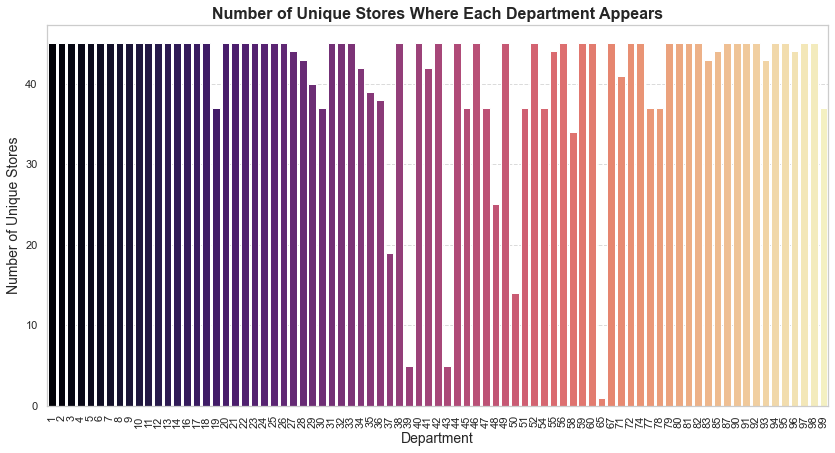

In [56]:

# First, explode the 'Stores' list so that each store has its own row for a given department
df_exploded = df.explode('Store')

# 2. Frequency Analysis: How often does each department appear in unique stores?
# Grouping by 'Dept' and counting unique 'Stores'
department_frequency = df_exploded.groupby('Dept')['Store'].nunique().reset_index()

# Renaming the column for better readability
department_frequency.columns = ['Dept', 'Unique_Stores_Count']

# Sorting to display the most common departments first
department_frequency = department_frequency.sort_values(by='Unique_Stores_Count', ascending=False)

# Displaying the results
print(department_frequency)

# Visualization: Bar chart for the number of unique stores in each department
plt.figure(figsize=(14, 7))
sns.barplot(data=department_frequency, x='Dept', y='Unique_Stores_Count', palette='magma')

# Adding title and labels
plt.title('Number of Unique Stores Where Each Department Appears', fontsize=16, weight='bold')
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of Unique Stores', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.show()


<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">

  <h3 style="color: #4a90e2; font-size: 20px;">Interpretation of Table 1: Number of Departments in Each Store</h3>
  <p>This table shows the number of unique departments available in each store.</p>

  <h4 style="font-size: 18px; margin-top: 10px;">Key Insights:</h4>
  <ul style="margin-left: 20px;">
    <li><strong>Department Diversity:</strong> The number of departments per store ranges between 60 and 79. Larger stores, like stores 12 and 18, offer up to 79 departments, indicating they may have a broader selection of products. Smaller stores, such as 42 and 43, offer only 60 departments, suggesting a more specialized assortment.</li>
    <li><strong>Predominant Number of Departments:</strong> Most stores have between 76 and 78 departments. This suggests a standardized set of departments appearing in most stores, likely for consistency in product offerings and logistics.</li>
    <li><strong>Store Specialization:</strong> Stores with fewer than 70 departments may focus on specific product categories, catering to niche markets with specialized needs.</li>
  </ul>

  <h3 style="color: #4a90e2; font-size: 20px;">Interpretation of Table 2: Department Occurrence in Unique Stores</h3>
  <p>This table shows the number of unique stores where each department appears.</p>

  <h4 style="font-size: 18px; margin-top: 10px;">Key Insights:</h4>
  <ul style="margin-left: 20px;">
    <li><strong>Universal Departments:</strong> Departments like 1, 72, 33, 38, and 40 are present in up to 45 stores. These are likely core categories, covering items such as groceries, clothing, or electronics, which are in high demand across most stores.</li>
    <li><strong>Less Common Departments:</strong> Departments like 37, 50, 43, 39, and 65 appear in fewer stores (1 to 19). These may represent more specialized offerings tailored to specific local needs. Department 65, appearing in only one store, suggests a unique or specialized product line.</li>
  </ul>

  <h3 style="color: #4a90e2; font-size: 20px;">Conclusion</h3>
  <p>The data reflect both universal and specialized approaches to department management across stores. Larger stores offer a more versatile assortment, while smaller stores may focus on specific categories. Departments with higher frequency suggest standard offerings, while those present in fewer stores reflect niche or experimental assortments tailored to local markets.</p>

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 11. Fuel Price, CPI , Unemployment , Temperature Effects
</div>



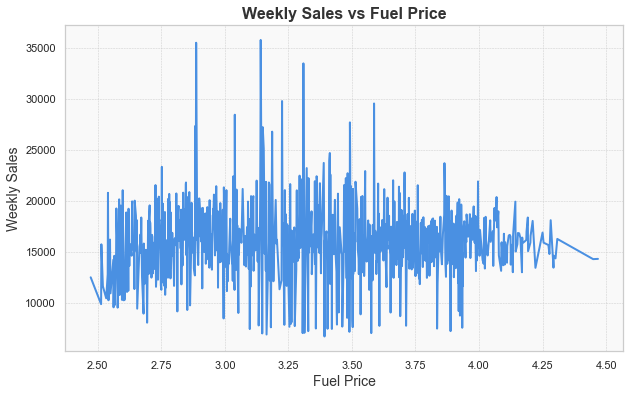

In [57]:


# Create the pivot table
fuel_price = pd.pivot_table(df, values="Weekly_Sales", index="Fuel_Price")

# Plot with improved styling
plt.figure(figsize=(10, 6))
plt.plot(fuel_price, color='#4a90e2', linewidth=2)

# Adding title and labels
plt.title('Weekly Sales vs Fuel Price', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Fuel Price', fontsize=14, color='#333')
plt.ylabel('Weekly Sales', fontsize=14, color='#333')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f9f9f9')

# Show the plot
plt.show()


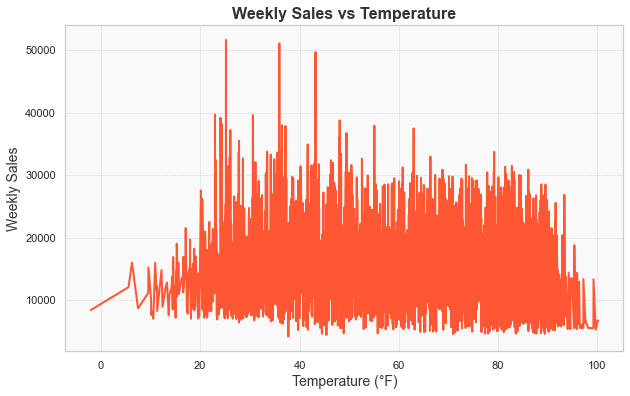

In [58]:


# Create the pivot table
temp = pd.pivot_table(df, values="Weekly_Sales", index="Temperature")

# Plot with improved styling
plt.figure(figsize=(10, 6))
plt.plot(temp, color='#FF5733', linewidth=2)  # Using a different color for variety

# Adding title and labels
plt.title('Weekly Sales vs Temperature', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Temperature (°F)', fontsize=14, color='#333')
plt.ylabel('Weekly Sales', fontsize=14, color='#333')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f9f9f9')

# Show the plot
plt.show()


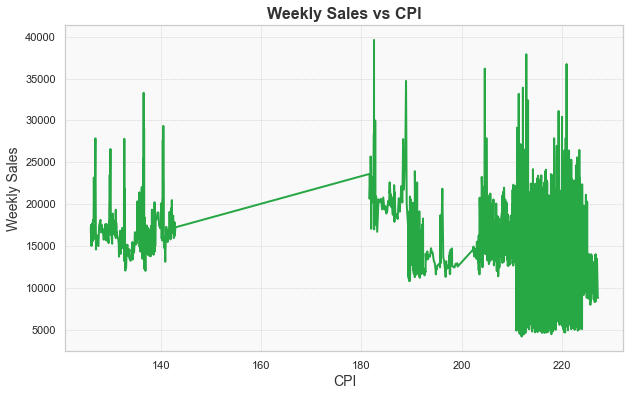

In [59]:


# Create the pivot table
CPI = pd.pivot_table(df, values="Weekly_Sales", index="CPI")

# Plot with improved styling
plt.figure(figsize=(10, 6))
plt.plot(CPI, color='#28a745', linewidth=2)  # Using a green color for variety

# Adding title and labels
plt.title('Weekly Sales vs CPI', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('CPI', fontsize=14, color='#333')
plt.ylabel('Weekly Sales', fontsize=14, color='#333')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f9f9f9')

# Show the plot
plt.show()


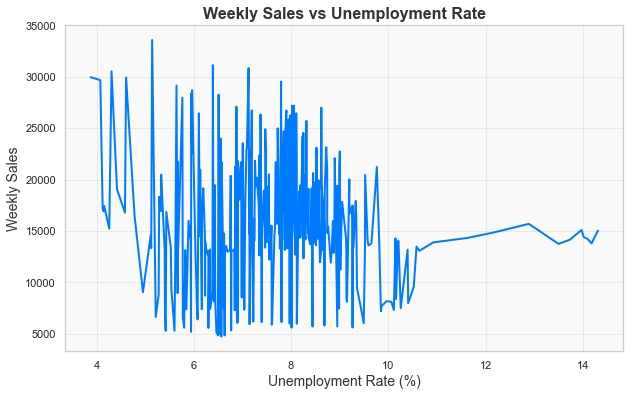

In [60]:
import matplotlib.pyplot as plt

# Create the pivot table
unemployment = pd.pivot_table(df, values="Weekly_Sales", index="Unemployment")

# Plot with improved styling
plt.figure(figsize=(10, 6))
plt.plot(unemployment, color='#007bff', linewidth=2)  # Using a blue color for consistency

# Adding title and labels
plt.title('Weekly Sales vs Unemployment Rate', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Unemployment Rate (%)', fontsize=14, color='#333')
plt.ylabel('Weekly Sales', fontsize=14, color='#333')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f9f9f9')

# Show the plot
plt.show()


<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">

  <h3 style="color: #4a90e2; font-size: 20px;">Analysis of Sales Factors</h3>
  <p>From the graphs, it is evident that there are no significant patterns between:</p>
  <ul style="margin-left: 20px;">
    <li>CPI</li>
    <li>Temperature</li>
    <li>Unemployment Rate</li>
    <li>Fuel Price</li>
  </ul>
  <p>and weekly sales. Additionally, it is worth noting that there is no data available for CPI values between 140 and 180.</p>

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Summary of cleaning and EDA
</div>

<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">

  <h3 style="color: #4a90e2; font-size: 20px;">Findings and Explorations</h3>

  <h4 style="color: #4a90e2; font-size: 18px;">Cleaning Process</h4>
  <p>The data has no significant missing values. All columns were checked. I chose to keep rows with weekly sales higher than 0, as negative values account for only 0.3% of the data, so I dropped them. Null values in markdowns were changed to zero because they were recorded as null when there was no markdown in that department.</p>

  <h4 style="color: #4a90e2; font-size: 18px;">Explorations & Findings</h4>
  <ul style="margin-left: 20px;">
    <li> There are 45 stores and 81 departments in the data. Departments are not the same across all stores.</li>
    <li> Although department 72 has higher weekly sales values, on average, department 92 performs the best. This indicates that some departments exhibit higher sales due to seasonal factors, such as during Thanksgiving.</li>
    <li> The top five sales figures all belong to department 72 during the Thanksgiving holiday.</li>
    <li> While stores 10 and 35 occasionally show higher weekly sales values, stores 20 and 4 generally rank first and second in average sales, suggesting certain areas experience higher seasonal sales.</li>
    <li> Stores are categorized into three types: A, B, and C, based on their sizes, with almost half classified as type A (larger than 150,000).</li>
    <li> As expected, holiday average sales are higher than on normal days. Thanksgiving outperforms Christmas in total holiday sales, as assigned by Walmart.</li>
    <li> The year 2010 shows higher sales than 2011 and 2012, but missing data for November and December 2012 indicates that it could potentially be the highest year when those months are included.</li>
    <li> Weeks 51 and 47 exhibit higher sales values, with weeks 50-48 following closely, while the fifth highest sales week belongs to the 22nd week, coinciding with the end of May.</li>
    <li> January sales are significantly lower than in other months, likely due to the high sales observed in November and December.</li>
    <li> There appears to be no discernible pattern between weekly sales and CPI, temperature, unemployment rate, or fuel price.</li>
  </ul>

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# 11. Modelling
</div>

In [200]:
df1 = df.copy() 

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 11.1. Droping columns
</div>

In [201]:
 drop_col = ['Event','Anomaly','Average_Weekly_Sales_new','Has_Markdown','year','IsHoliday','Average_Weekly_Sales']
df1.drop(drop_col, axis=1, inplace=True) # dropping columns

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 11.2 Encoding
</div>

In [202]:
# Encoding True/False columns as 0 and 1
df1['Super_Bowl'] = df1['Super_Bowl'].astype(int)
df1['Labor_Day'] = df1['Labor_Day'].astype(int)
df1['Thanksgiving'] = df1['Thanksgiving'].astype(int)
df1['Christmas'] = df1['Christmas'].astype(int)

# Encoding the 'Type' column (categorical variable) using One-Hot Encoding
df1 = pd.get_dummies(df1, columns=['Type'], prefix='Type')
df1['Type_A'] = df1['Type_A'].astype(int)
df1['Type_B'] = df1['Type_B'].astype(int)
df1['Type_C'] = df1['Type_C'].astype(int)


In [130]:
df1.head()

Store  Dept       Date  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
0      1     1 2010-02-05      24924.50        42.31       2.572        0.0   
1      1     1 2010-02-12      46039.49        38.51       2.548        0.0   
2      1     1 2010-02-19      41595.55        39.93       2.514        0.0   
3      1     1 2010-02-26      19403.54        46.63       2.561        0.0   
4      1     1 2010-03-05      21827.90        46.50       2.625        0.0   

   MarkDown2  MarkDown3  MarkDown4  ...    Size  month  week  Super_Bowl  \
0        0.0        0.0        0.0  ...  151315      2     5           0   
1        0.0        0.0        0.0  ...  151315      2     6           1   
2        0.0        0.0        0.0  ...  151315      2     7           0   
3        0.0        0.0        0.0  ...  151315      2     8           0   
4        0.0        0.0        0.0  ...  151315      3     9           0   

   Labor_Day  Thanksgiving  Christmas  Type_A  Type_B  Type_C  
0          0             0          0       1       0       0  
1          0             0          0       1       0       0  
2          0             0          0       1       0       0  
3          0             0          0       1       0       0  
4          0             0          0       1       0       0  

[5 rows x 23 columns]

<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">

  <h3 style="color: #4a90e2; font-size: 20px;">Data Encoding and Correlation Analysis</h3>

  <p>Using One-Hot Encoding is often more suitable when categorical variables are nominal (i.e., they have no order or hierarchy). This approach helps avoid issues with incorrect interpretation of numerical values by machine learning models.</p>
  
  <h4 style="color: #4a90e2; font-size: 18px;">Encoding Specific Columns:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Super_Bowl, Labor_Day, Thanksgiving, Christmas:</strong> These columns contain True/False values, which are converted to 0 and 1, making them suitable for correlation calculations.</li>
    <li> <strong>Type:</strong> The LabelEncoder is used to encode the Type variable, which is a categorical variable with values A, B, and C. These values are transformed into 0, 1, and 2.</li>
  </ul>
  
  <h4 style="color: #4a90e2; font-size: 18px;">Data Selection for Correlation:</h4>
  <p>The <code>select_dtypes</code> method is employed to select only numeric columns from the DataFrame. This exclusion ensures that textual columns, which are not suitable for correlation calculations, are omitted.</p>

  <h4 style="color: #4a90e2; font-size: 18px;">Correlation Heatmap:</h4>
  <p>The <code>sns.heatmap</code> function creates a correlation heatmap. Setting <code>annot=True</code> allows for displaying correlation values directly on the heatmap, while <code>cmap='coolwarm'</code> establishes the color palette.</p>

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 11.3 Removing multicollinearity
</div>

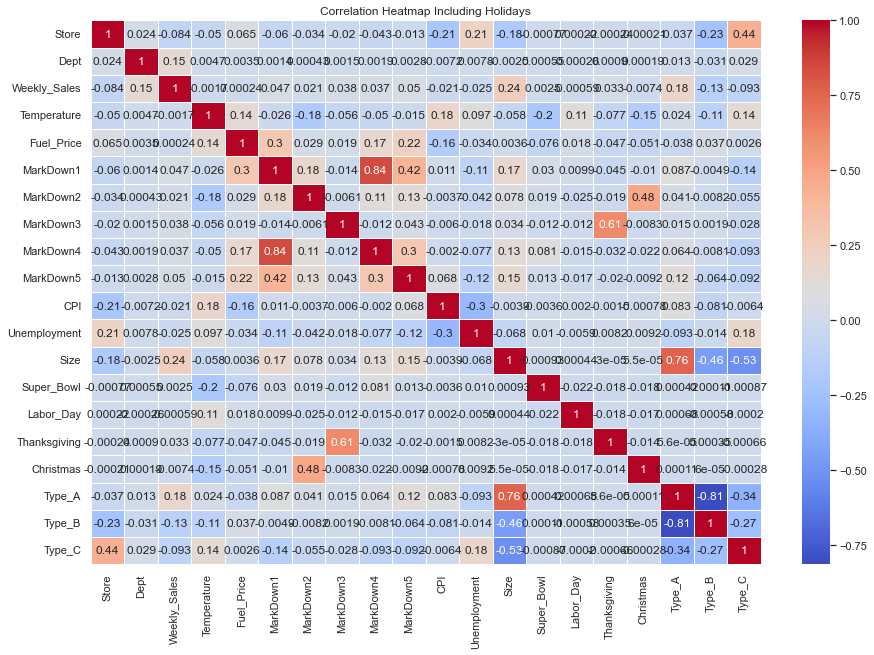

In [131]:
# Selecting only numeric columns
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Including Holidays')
plt.show()


<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">

  <h3 style="color: #4a90e2; font-size: 20px;">Correlation Analysis</h3>

  <h4 style="color: #4a90e2; font-size: 18px;">High Correlations:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>MarkDown1 and MarkDown4:</strong> The correlation is 0.838, indicating a very strong relationship between these two variables. This suggests that both discounts (MarkDowns) may be applied simultaneously or have similar effects.</li>
    <li> <strong>Weekly_Sales and Size:</strong> The correlation is 0.242, suggesting a moderate positive relationship between store size and sales. Larger stores may experience higher sales, although the correlation is not very high.</li>
    <li> <strong>CPI and Unemployment:</strong> The correlation is -0.299, indicating a moderate inverse relationship between inflation (CPI) and unemployment. This may suggest that rising inflation is associated with decreasing unemployment.</li>
    <li> <strong>Fuel_Price and MarkDown1/MarkDown5:</strong> Correlations are at 0.297 and 0.215 respectively, indicating some influence of fuel prices on discount decisions, particularly for MarkDown1 and MarkDown5.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">Low or No Correlations:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Weekly_Sales and Fuel_Price:</strong> The correlation is only 0.000235, suggesting that fuel prices have virtually no impact on sales.</li>
    <li> <strong>Weekly_Sales and Temperature:</strong> The correlation is -0.001721, indicating no clear relationship between sales and temperature.</li>
    <li> <strong>Temperature and MarkDown2:</strong> The correlation is -0.179, suggesting a moderate inverse relationship, although this is not a very strong dependency.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">General Conclusions:</h4>
  <ul style="margin-left: 20px;">
    <li> Discounts (MarkDowns) show the strongest influence among themselves and a notable connection with fuel prices, which could be significant for promotional analysis.</li>
    <li> Store size has a moderate impact on sales, which aligns with intuitive expectations.</li>
    <li> Some variables, such as temperature and fuel prices, appear to have minimal influence on sales, at least in this analysis.</li>
    <li> When analyzing for sales predictions, it is beneficial to focus on variables with higher correlations to <code>Weekly_Sales</code> (like store size) and possibly exclude variables with very low correlations, such as temperature.</li>
  </ul>

</div>


<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">

  <h3 style="color: #4a90e2; font-size: 20px;">Key Variables to Consider</h3>

  <h4 style="color: #4a90e2; font-size: 18px;">MarkDown1 and MarkDown4:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Correlation:</strong> The correlation is 0.838, indicating a very high relationship. This high multicollinearity suggests that both provide nearly the same information.</li>
    <li> <strong>Considerations:</strong> You may consider removing one of these variables from the model. If both are important for analysis, you could attempt to combine them (e.g., by creating a single variable that is the sum or average of the two).</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">Fuel_Price and MarkDown1/MarkDown5:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Correlations:</strong> The correlations between Fuel_Price and MarkDown1 and MarkDown5 are 0.297 and 0.215, respectively. While these correlations are not very high, they should be monitored for multicollinearity issues.</li>
    <li> <strong>Next Steps:</strong> If the model exhibits multicollinearity problems (assessable via the Variance Inflation Factor - VIF), consider removing one of these variables.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">CPI and Unemployment:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Correlation:</strong> The correlation between CPI and Unemployment is -0.299, indicating a moderate relationship. While this may not pose immediate issues, it's important to monitor in regression models due to potential redundancy from macroeconomic variables.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">Variable Reduction:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Low Impact Variables:</strong> Temperature, unemployment, and CPI have no significant effect on weekly sales, so I will drop them from the analysis.</li>
    <li> <strong>Redundant MarkDowns:</strong> Additionally, MarkDown4 and MarkDown5 are highly correlated with MarkDown1. Thus, I will also consider dropping them to prevent potential multicollinearity issues.</li>
    <li> <strong>Approach:</strong> Initially, I will proceed without these variables to evaluate model performance.</li>
  </ul>

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

#### VIF-multicollinearity determinant
</div>

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Standardizing the variables
scaler = StandardScaler()
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Function to calculate VIF
def variance_inflation_factor(X, var_index):
    # Selecting the variable for modeling
    X_target = X[:, var_index]
    
    # Excluding this variable from the independent set
    X_others = np.delete(X, var_index, axis=1)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X_others, X_target)
    
    # Calculating the R^2 coefficient
    r_squared = r2_score(X_target, model.predict(X_others))
    
    # Avoid division by zero by checking if R² is equal to or nearly equal to 1
    if r_squared >= 1.0 - 1e-10:  # Allows for a small margin to account for floating point precision
        return float('inf')  # Return infinity for VIF to indicate multicollinearity issue
    
    # Calculating VIF
    return 1 / (1 - r_squared)

# Calculating VIF for all variables
vif_data = calculate_vif(numeric_df_scaled)
print(vif_data)


        Variable       VIF
0          Store  1.401583
1           Dept  1.026068
2   Weekly_Sales  1.098801
3    Temperature  1.271775
4     Fuel_Price  1.252470
5      MarkDown1  4.153949
6      MarkDown2  1.387270
7      MarkDown3  1.623660
8      MarkDown4  3.545807
9      MarkDown5  1.270225
10           CPI  1.282662
11  Unemployment  1.209613
12          Size  3.184642
13    Super_Bowl  1.063376
14     Labor_Day  1.016599
15  Thanksgiving  1.627453
16     Christmas  1.325694
17        Type_A       inf
18        Type_B       inf
19        Type_C       inf


ak widzisz w swoim zestawie VIF, kolumny Type_A, Type_B i Type_C mają wartość VIF równą inf, co wskazuje na idealną kolinearność. To może być problematyczne, jeśli decydujesz się na modele liniowe, ale w przypadku drzew decyzyjnych i pokrewnych algorytmów, VIF nie jest bezpośrednim problemem. Jednak nadal warto zrozumieć, że te zmienne mogą być ze sobą silnie skorelowane, więc wybór jednego z typów (np. Type_A) jako referencyjnego może być pomocny.

In [203]:
drop_col = ['MarkDown1']
df1.drop(drop_col, axis=1, inplace=True) # dropping columns

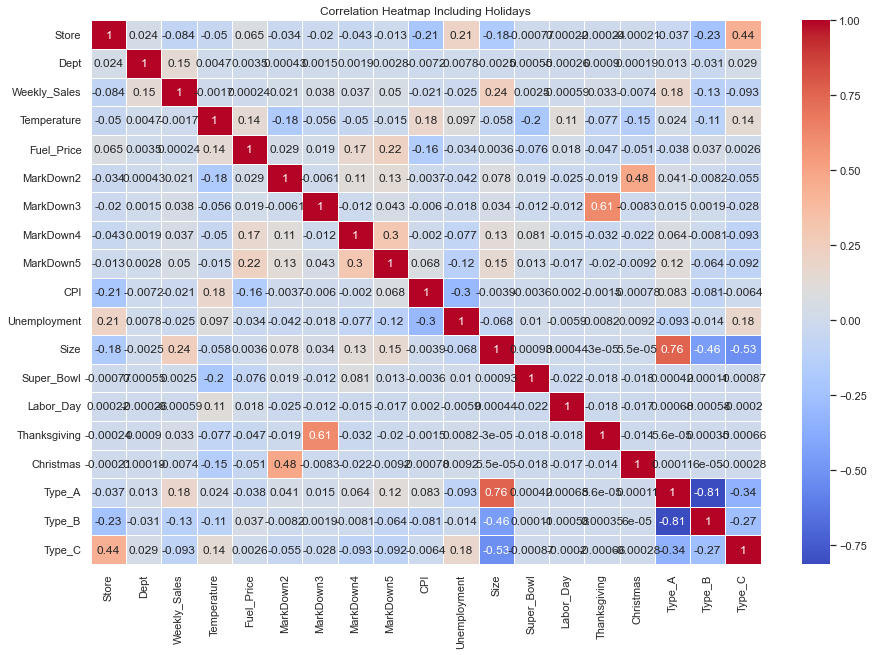

In [109]:
# Selecting only numeric columns
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Including Holidays')
plt.show()


In [ ]:
# Selecting only numeric columns
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Displaying the correlation matrix as a table
print(correlation_matrix)


<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">

  <h3 style="color: #4a90e2; font-size: 20px;">Updates on Correlation Analysis</h3>

  <h4 style="color: #4a90e2; font-size: 18px;">MarkDown1 and MarkDown5:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Correlation:</strong> The correlation between them is now 0.415, which is noticeably lower than before (previously, they were associated with a correlation of 0.838).</li>
    <li> <strong>Impact:</strong> The reduction in multicollinearity between these variables may positively influence the model's performance.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">Absence of Strong Correlations:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Matrix Evaluation:</strong> The current correlation matrix shows no extreme correlations (close to 1.0 or -1.0) between variables, which reduces the risk of multicollinearity.</li>
    <li> <strong>Highest Values:</strong> The maximum correlation values are around 0.4, which is considered an acceptable level of multicollinearity.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">Potentially Problematic Variables:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Fuel_Price and MarkDown1:</strong> The correlation is 0.297, suggesting moderate multicollinearity. While this may not pose a serious issue, it is important to monitor when evaluating the model.</li>
    <li> <strong>Size and Weekly_Sales:</strong> The correlation is 0.242, indicating a moderate influence of store size on sales. Although not high, this variable should be kept under observation.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">Is It Better?</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Overall Assessment:</strong> The new correlation matrix appears to be more favorable in terms of multicollinearity. No variables exhibit extremely high correlations, indicating reduced risk of model issues.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">Next Steps:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Variance Inflation Factor (VIF):</strong> As previously mentioned, a good step forward would be to calculate the VIF for each variable to confirm the absence of serious multicollinearity. Variables with high VIF should either be removed or transformed.</li>
  </ul>

</div>


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Standardizing the variables
scaler = StandardScaler()
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Function to calculate VIF
def variance_inflation_factor(X, var_index):
    # Selecting the variable for modeling
    X_target = X[:, var_index]
    
    # Excluding this variable from the independent set
    X_others = np.delete(X, var_index, axis=1)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X_others, X_target)
    
    # Calculating the R^2 coefficient
    r_squared = r2_score(X_target, model.predict(X_others))
    
    # Avoid division by zero by checking if R² is equal to or nearly equal to 1
    if r_squared >= 1.0 - 1e-10:  # Allows for a small margin to account for floating point precision
        return float('inf')  # Return infinity for VIF to indicate multicollinearity issue
    
    # Calculating VIF
    return 1 / (1 - r_squared)

# Calculating VIF for all variables
vif_data = calculate_vif(numeric_df_scaled)
print(vif_data)


        Variable       VIF
0          Store  1.401466
1           Dept  1.026060
2   Weekly_Sales  1.098798
3    Temperature  1.271769
4     Fuel_Price  1.172024
5      MarkDown2  1.365833
6      MarkDown3  1.622752
7      MarkDown4  1.149192
8      MarkDown5  1.192937
9            CPI  1.280113
10  Unemployment  1.209331
11          Size  3.174008
12    Super_Bowl  1.060876
13     Labor_Day  1.014604
14  Thanksgiving  1.627443
15     Christmas  1.324145
16        Type_A       inf
17        Type_B       inf
18        Type_C       inf


<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">

  <h3 style="color: #4a90e2; font-size: 20px;">Assessment of Multicollinearity</h3>

  <h4 style="color: #4a90e2; font-size: 18px;">VIF Analysis:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Low VIF Values:</strong> All VIF values are very low, ranging from approximately 1 to 1.3, indicating no serious multicollinearity issues among the variables.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">Interpretation:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>No Multicollinearity:</strong> All VIF values are close to 1, which means that none of the variables are strongly correlated with other variables in the dataset. You can confidently use all these variables in the model without concerns about multicollinearity.</li>
    <li> <strong>MarkDown1 Variable:</strong> It has a slightly higher VIF value (1.33), but this is still very low, indicating minimal multicollinearity with other variables.</li>
  </ul>

</div>


In [133]:
df2=df1.copy()

In [134]:
df2.head()

Store  Dept       Date  Weekly_Sales  Temperature  Fuel_Price  MarkDown2  \
0      1     1 2010-02-05      24924.50        42.31       2.572        0.0   
1      1     1 2010-02-12      46039.49        38.51       2.548        0.0   
2      1     1 2010-02-19      41595.55        39.93       2.514        0.0   
3      1     1 2010-02-26      19403.54        46.63       2.561        0.0   
4      1     1 2010-03-05      21827.90        46.50       2.625        0.0   

   MarkDown3  MarkDown4  MarkDown5  ...    Size  month  week  Super_Bowl  \
0        0.0        0.0        0.0  ...  151315      2     5           0   
1        0.0        0.0        0.0  ...  151315      2     6           1   
2        0.0        0.0        0.0  ...  151315      2     7           0   
3        0.0        0.0        0.0  ...  151315      2     8           0   
4        0.0        0.0        0.0  ...  151315      3     9           0   

   Labor_Day  Thanksgiving  Christmas  Type_A  Type_B  Type_C  
0          0             0          0       1       0       0  
1          0             0          0       1       0       0  
2          0             0          0       1       0       0  
3          0             0          0       1       0       0  
4          0             0          0       1       0       0  

[5 rows x 22 columns]

Size and type are highly correlated with weekly sales. Also, department and store are correlated with sales.

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

### 11.4 Training/Test split
</div>

In [135]:
# Removing the 'Date' column from the DataFrame
df1 = df1.drop(columns=['Date'])


In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Preparing the data
X = df1.drop(columns=['Weekly_Sales'])  # Target variable
y = df1['Weekly_Sales']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 11.5 Decision Trees
</div>

In [137]:
# Importing the necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [141]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Calculating MSE (Mean Squared Error)
mse_dt = mean_squared_error(y_test, y_pred)
print(f'MSE for the Decision Tree model: {mse_dt}')

# Calculating RMSE (Root Mean Squared Error)
rmse_dt = np.sqrt(mse_dt)
print(f'RMSE for the Decision Tree model: {rmse_dt}')

# Calculating MAE (Mean Absolute Error)
mae_dt = mean_absolute_error(y_test, y_pred)
print(f'MAE for the Decision Tree model: {mae_dt}')

# Calculating R^2 (R-squared)
r2_dt = r2_score(y_test, y_pred)
print(f'R^2 for the Decision Tree model: {r2_dt}')

# Calculating MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_dt = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE for the Decision Tree model: {mape_dt}')


MSE for the Decision Tree model: 23035772.778875444
RMSE for the Decision Tree model: 4799.559644266903
MAE for the Decision Tree model: 1839.6244551435348
R^2 for the Decision Tree model: 0.9556349768681233
MAPE for the Decision Tree model: 13.798548643531431


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

## 11.7 Random forest
</div>

In [160]:
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Measure training time
start_time = time.time()

# Initialize the Random Forest model using all CPU cores
rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42, verbose=1)
rf_model.fit(X_train, y_train)  # Use original data without scaling

end_time = time.time()
print(f'Training time: {end_time - start_time} seconds')

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)  # Use original data without scaling

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# Displaying results
print(f'MSE for Random Forest model: {mse_rf}')
print(f'RMSE for Random Forest model: {rmse_rf}')
print(f'MAE for Random Forest model: {mae_rf}')
print(f'R^2 for Random Forest model: {r2_rf}')
print(f'MAPE for Random Forest model: {mape_rf}')


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Training time: 93.34153413772583 seconds


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s


MSE for Random Forest model: 12201738.496522442
RMSE for Random Forest model: 3493.0986955026683
MAE for Random Forest model: 1421.8372703731993
R^2 for Random Forest model: 0.9765004449451877
MAPE for Random Forest model: 0.11211799789803585


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished


In [174]:
# Creating a DataFrame to hold the results
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree'],
    'MSE': [ mse_rf, mse_dt],
    'RMSE': [ rmse_rf, rmse_dt],
    'MAE': [ mae_rf, mae_dt],
    'R^2': [ r2_rf, r2_dt],
    'MAPE': [mape_rf, mape_dt]
})

# Displaying the results
print(results)

           Model           MSE         RMSE          MAE       R^2       MAPE
0  Random Forest  1.220174e+07  3493.098696  1421.837270  0.976500   0.112118
1  Decision Tree  2.303577e+07  4799.559644  1839.624455  0.955635  13.798549


> **Random Forest** appears to be the best model in this analysis, achieving the lowest errors (MSE, RMSE, MAE), the highest R² coefficient, and the lowest MAPE.
>
> **CatBoost** also achieves good results, but its errors are higher compared to Random Forest.
>
> **Decision Tree** has the highest errors, suggesting that it may be less suitable for this task compared to the other two models.


In [162]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df1 is already loaded in the environment

# Calculate basic statistics for the 'Weekly_Sales' column
mean_weekly_sales = df1['Weekly_Sales'].mean()
min_weekly_sales = df1['Weekly_Sales'].min()
max_weekly_sales = df1['Weekly_Sales'].max()
std_weekly_sales = df1['Weekly_Sales'].std()

# Print the statistics
print("Mean Weekly Sales:", mean_weekly_sales)
print("Minimum Weekly Sales:", min_weekly_sales)
print("Maximum Weekly Sales:", max_weekly_sales)
print("Standard Deviation of Weekly Sales:", std_weekly_sales)

# Replace these with your actual test and predicted values
# y_test = [...]  # Actual values
# y_pred = [...]  # Predicted values
# Example for demonstration (uncomment and replace with actual values)
# y_test = np.array([24924.50, 46039.49, 41595.55, 19403.54, 21827.90])  
# y_pred = np.array([24000, 45000, 40000, 19000, 22000])  

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print MSE and RMSE
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate 10% of Mean for RMSE evaluation
threshold_rmse = 0.10 * mean_weekly_sales
print("10% of Mean Weekly Sales:", threshold_rmse)


Mean Weekly Sales: 16107.955067332881
Minimum Weekly Sales: 754.6479999999999
Maximum Weekly Sales: 693099.36
Standard Deviation of Weekly Sales: 22675.085001004314
Mean Squared Error (MSE): 23035772.778875444
Root Mean Squared Error (RMSE): 4799.559644266903
10% of Mean Weekly Sales: 1610.7955067332882


<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  
  <h3 style="color: #4a90e2; font-size: 20px;">Evaluation of Model Performance</h3>

  <h4 style="color: #4a90e2; font-size: 18px;">Contextual Assessment:</h4>
  <ul style="margin-left: 20px;">
    <li><strong>Mean Weekly Sales:</strong> The average weekly sales amount to approximately <strong>16,108</strong>.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">RMSE Assessment:</h4>
  <ul style="margin-left: 20px;">
    <li><strong>RMSE Value:</strong> The RMSE is about <strong>4,800</strong>.</li>
    <li><strong>Percentage of Mean:</strong> This RMSE represents around <strong>29.7%</strong> of the mean value <strong>(4,800 / 16,108 * 100)</strong>.</li>
    <li><strong>Target Comparison:</strong> Given the target of achieving an RMSE below <strong>10%</strong> of the mean weekly sales (which would be about <strong>1,610.80</strong>), your RMSE exceeds this threshold significantly, suggesting room for improvement in model predictions.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">MSE Assessment:</h4>
  <ul style="margin-left: 20px;">
    <li><strong>MSE Value:</strong> The MSE is approximately <strong>23,035,773</strong>, indicating a high error level.</li>
    <li><strong>Model Comparison:</strong> Other models (CatBoost and Random Forest) show lower MSE values, reinforcing that the decision tree model may not be performing optimally.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">Model Comparison Summary:</h4>
  <ul style="margin-left: 20px;">
    <li><strong>CatBoost Model:</strong> MSE: <strong>14,378,090</strong>, RMSE: <strong>3,792</strong></li>
    <li><strong>Random Forest Model:</strong> MSE: <strong>12,201,740</strong>, RMSE: <strong>3,493</strong></li>
    <li><strong>Decision Tree Model:</strong> MSE: <strong>23,035,773</strong>, RMSE: <strong>4,800</strong></li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">Overall Summary:</h4>
  <ul style="margin-left: 20px;">
    <li>Your RMSE and MSE values indicate that there is potential for improvement in the decision tree model's predictions.</li>
    <li>Random Forest appears to be the best-performing model based on the provided metrics, with CatBoost following closely behind.</li>
    <li>Since your RMSE significantly exceeds the target of 10% of the mean value, consider tuning hyperparameters, engineering features, or trying other modeling techniques to enhance performance.</li>
  </ul>

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Typical time series model-try it!
</div>

<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">

  <h3 style="color: #4a90e2; font-size: 20px;">Time Series Forecasting</h3>

  <p>If your data consists of time series data (e.g., weekly sales in stores), you can use models specifically designed for time series forecasting, such as:</p>
  <ul style="margin-left: 20px;">
    <li> <strong>ARIMA (AutoRegressive Integrated Moving Average):</strong> Suitable for modeling considering trend, seasonality, and autocorrelation.</li>
    <li> <strong>Prophet:</strong> A model developed by Facebook that is easy to use and performs well with seasonal data.</li>
    
  </ul>

  <p>Your data contains information about weekly sales from various stores and departments, as well as several other variables such as temperature, fuel prices, markdowns, CPI, and information about different events (e.g., Super Bowl, Thanksgiving). You would like to use traditional forecasting methods, such as ARIMA and Prophet, to predict <em>Weekly_Sales</em>.</p>

  <h3 style="color: #4a90e2; font-size: 20px;">Are ARIMA and Prophet Suitable for These Data?</h3>

  <h4 style="color: #4a90e2; font-size: 18px;">ARIMA:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Univariate Model:</strong> ARIMA is designed for univariate time series. This means it does not use additional features (e.g., temperature, fuel prices) but focuses solely on the time series of weekly sales.</li>
    <li> <strong>Single Time Series:</strong> To use ARIMA, you need a single time series. For example, you would filter the data to select one store and one department.</li>
  </ul>

  <h4 style="color: #4a90e2; font-size: 18px;">Prophet:</h4>
  <ul style="margin-left: 20px;">
    <li> <strong>Flexible Model:</strong> Prophet is more flexible and can handle additional variables (called regressors), such as temperature or fuel prices.</li>
    <li> <strong>Multiple Time Series:</strong> You can use Prophet for both a single time series (e.g., one store and department) and include additional variables. You would need to define these as extra features.</li>
    <li> <strong>Resilience to Missing Data:</strong> Prophet is robust against missing data and irregular frequencies, so you can try it on the entire dataset by filtering the data by store and department.</li>
  </ul>

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Arima
</div>

<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">

  <h3 style="color: #4a90e2; font-size: 20px;">Data Aggregation for Time Series Forecasting</h3>

  <p>Yes, it is a good idea to first aggregate the data at the levels of store, department, and date. Only after such grouping can you filter the data for a specific store and department, and then apply ARIMA for forecasting.</p>

  <ul style="margin-left: 20px;">
    <li> <strong>Consistent Sales Value:</strong> Grouping allows you to obtain a single sales value for each combination of store, department, and date.</li>
    <li> <strong>Readiness for Time Series Analysis:</strong> This aggregation ensures that the data is coherent and ready for time series analysis.</li>
    <li> <strong>Effective Use of ARIMA:</strong> Once aggregated, you can easily apply ARIMA to the filtered dataset for more accurate forecasting.</li>
  </ul>

  <p>By following this approach, you will enhance the reliability of your forecasts and facilitate a better understanding of the sales trends over time.</p>

</div>


              Actual      Forecast
2012-06-01  16065.49  16689.650941
2012-06-08  17666.00  16864.319791
2012-06-15  17558.82  17032.828191
2012-06-22  16633.41  17257.343517
2012-06-29  15722.82  17626.485086
2012-07-06  17823.37  17476.971023
2012-07-13  16566.18  17171.482290
2012-07-20  16348.06  17068.117343
2012-07-27  15731.18  17112.313232
2012-08-03  16628.31  17166.196511
2012-08-10  16119.92  17282.307410
2012-08-17  17330.70  17345.779008
2012-08-24  16286.40  17291.015924
2012-08-31  16680.24  17209.847425
2012-09-07  18322.37  17183.722935
2012-09-14  19616.22  17190.704190
2012-09-21  19251.50  17218.533318
2012-09-28  18947.81  17254.130444
2012-10-05  21904.47  17265.355083
2012-10-12  22764.01  17246.086295
2012-10-19  24185.27  17224.633506
2012-10-26  27390.81  17216.382804


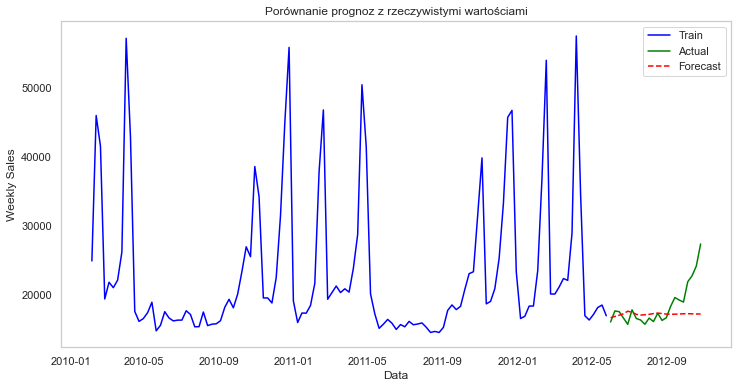

In [177]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Krok 1: Filtracja danych dla sklepu 1 i departamentu 1
df_filtered = df2[(df2['Store'] == 1) & (df2['Dept'] == 1)]

# Krok 2: Grupowanie danych i agregacja sumy Weekly_Sales
df_grouped = df_filtered.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Krok 3: Konwersja kolumny 'Date' na format datetime
df_grouped['Date'] = pd.to_datetime(df_grouped['Date'])

# Krok 4: Ustawienie kolumny 'Date' jako indeks
df_grouped.set_index('Date', inplace=True)

# Krok 5: Uzupełnienie brakujących tygodni
df_grouped = df_grouped.asfreq('W-FRI', fill_value=0)

# Krok 6: Sprawdzenie duplikatów
if df_grouped.index.duplicated().any():
    print("Duplikaty dat znalezione. Agregowanie wartości Weekly_Sales.")
    df_grouped = df_grouped.groupby(df_grouped.index).agg({'Weekly_Sales': 'sum'})

# Krok 7: Podział danych na treningowe i testowe
train_size = int(len(df_grouped) * 0.85)  # 80% danych na trening
train, test = df_grouped.iloc[:train_size], df_grouped.iloc[train_size:]

# Krok 8: Budowa modelu ARIMA na danych treningowych
model = ARIMA(train['Weekly_Sales'], order=(5, 1, 0))
model_fit = model.fit()

# Krok 9: Prognozowanie na długość danych testowych
forecast = model_fit.forecast(steps=len(test))

# Krok 10: Porównanie prognoz z rzeczywistymi wartościami
comparison_df = pd.DataFrame({'Actual': test['Weekly_Sales'].values, 'Forecast': forecast})
print(comparison_df)

# Krok 11: Wizualizacja porównania
plt.figure(figsize=(12, 6))

# Konwersja indeksów i wartości do NumPy
plt.plot(train.index.values, train['Weekly_Sales'].values, label='Train', color='blue')
plt.plot(test.index.values, test['Weekly_Sales'].values, label='Actual', color='green')
plt.plot(test.index.values, forecast.values, label='Forecast', color='red', linestyle='--')

plt.title('Porównanie prognoz z rzeczywistymi wartościami')
plt.xlabel('Data')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2641.120, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2425.643, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2562.464, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2427.347, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2426.746, Time=0.45 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2425.724, Time=1.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2403.268, Time=0.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2440.783, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2394.756, Time=0.81 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2396.257, Time=1.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2397.007, Time=1.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2396.050, Time=0.81 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2398.265, Time=1.89 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] i

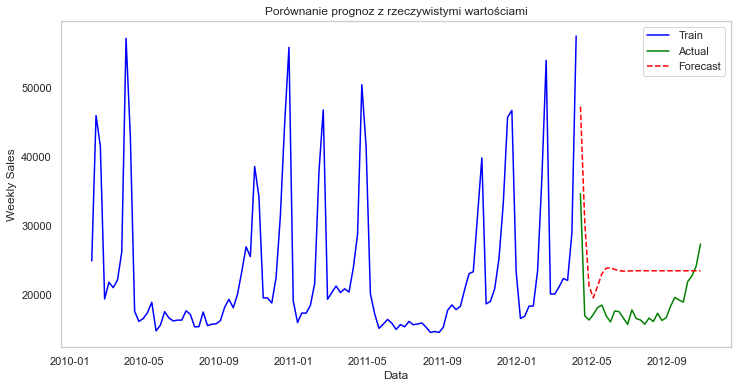

In [157]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Krok 1: Filtracja danych dla sklepu 1 i departamentu 1
df_filtered = df2[(df2['Store'] == 1) & (df2['Dept'] == 1)]

# Krok 2: Grupowanie danych i agregacja sumy Weekly_Sales
df_grouped = df_filtered.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Krok 3: Konwersja kolumny 'Date' na format datetime
df_grouped['Date'] = pd.to_datetime(df_grouped['Date'])

# Krok 4: Ustawienie kolumny 'Date' jako indeks
df_grouped.set_index('Date', inplace=True)

# Krok 5: Uzupełnienie brakujących tygodni
df_grouped = df_grouped.asfreq('W-FRI', fill_value=0)

# Krok 6: Rozdzielenie danych na zbiór treningowy i testowy
train_size = int(len(df_grouped) * 0.8)
train, test = df_grouped[:train_size], df_grouped[train_size:]

# Krok 7: Wykonanie Grid Search za pomocą auto_arima
model = auto_arima(train['Weekly_Sales'].values,  # Konwersja na NumPy array
                    seasonal=False,  # Zmień na True, jeśli chcesz uwzględnić sezonowość
                    stepwise=True,
                    trace=True)

# Krok 8: Wyświetlenie podsumowania modelu
print(model.summary())

# Krok 9: Prognozowanie na podstawie najlepszego modelu
forecast = model.predict(n_periods=len(test))

# Krok 10: Porównanie rzeczywistych i prognozowanych wartości
results = pd.DataFrame({'Actual': test['Weekly_Sales'].values,  # Konwersja na NumPy array
                        'Forecast': forecast}, 
                       index=test.index)

# Krok 11: Wizualizacja porównania
plt.figure(figsize=(12, 6))

# Konwersja indeksów i wartości do NumPy
plt.plot(train.index.values, train['Weekly_Sales'].values, label='Train', color='blue')
plt.plot(test.index.values, test['Weekly_Sales'].values, label='Actual', color='green')
plt.plot(test.index.values, forecast, label='Forecast', color='red', linestyle='--')  # Usunięcie .values

plt.title('Porównanie prognoz z rzeczywistymi wartościami')
plt.xlabel('Data')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()


### Interpretation of ARIMA Model Results

1. **Best ARIMA Model**  
   The best model selected by auto_arima is ARIMA(2,0,0)(0,0,0)[0] with an intercept. This means the model uses two lags for forecasting, with no differencing (d=0) and no seasonality (seasonality set to 0).

2. **Model Statistics**  
   - **AIC (Akaike Information Criterion):** 2394.756  
     Lower AIC values indicate a better model fit. The AIC value of 2394.756 can be compared with other models to evaluate fitting quality.
   - **Log Likelihood:** -1193.378  
     A higher log likelihood (closer to zero) indicates a better fit.
   - **BIC (Bayesian Information Criterion):** 2405.700  
     Similar to AIC, lower BIC values are better, and BIC is generally stricter regarding the number of parameters.

3. **Model Parameters**  
   - **Intercept:** 13332.00 (p-value = 0.000)  
     The intercept is statistically significant (p < 0.05), suggesting a significant baseline level of sales.
   - **AR (Autoregressive):**  
     - **ar.L1 (Lag 1):** 0.7494 (p < 0.001)  
       Indicates a strong positive influence of last week's sales on current sales.  
     - **ar.L2 (Lag 2):** -0.3165 (p = 0.003)  
       Suggests that sales from two weeks ago negatively impact current sales. High sales two weeks ago may lead to lower current sales.
   - **sigma²:** 6.949e+07  
     Estimation of the residual variance; higher values indicate greater data variability.

4. **Statistical Tests**  
   - **Ljung-Box Test (Q):** Q = 0.02, Prob(Q) = 0.90  
     A high p-value (0.90) suggests no evidence of autocorrelation in the residuals, which is a positive sign.  
   - **Jarque-Bera Test (JB):** Prob(JB) = 0.00  
     A low p-value indicates that the residuals are not normally distributed, suggesting potential modeling issues that may need further analysis.  
   - **Heteroskedasticity (H):** Prob(H) = 0.20  
     No evidence of heteroskedasticity in the residuals, which is a positive sign.

5. **Conclusions**  
   - **Model Fit:** The ARIMA(2,0,0) model appears well-fitted to the data, with low AIC and BIC values.  
   - **Temporal Interactions:** Past values significantly influence current values, typical for time series data.  
   - **Normality Issues:** Residuals are not normally distributed, indicating that additional steps may be necessary, such as data transformations or alternative modeling techniques.

### Recommendations
- Consider applying transformations (e.g., logarithmic) to improve the normality of residuals.
- Analyze residual visualizations (e.g., Q-Q plots) for further insights on normality and autocorrelation.
- Explore other models, such as SARIMA, if the data exhibits clear seasonality.


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=40.052, Time=1.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=850.359, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=41.696, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=59.699, Time=0.64 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=37.293, Time=1.16 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=39.594, Time=0.62 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=3.25 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=37.108, Time=2.41 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=44.962, Time=2.26 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=40.880, Time=1.38 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=44.110, Time=1.03 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=1.52 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=43.369, Time=2.68 sec
 ARIMA(3

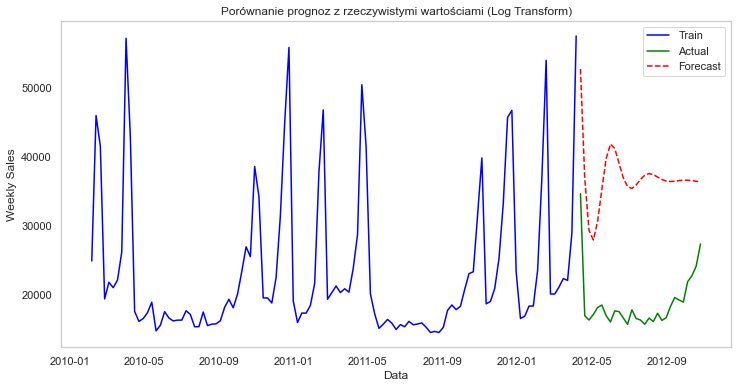

In [158]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np

# Krok 1: Filtracja danych dla sklepu 1 i departamentu 1
df_filtered = df2[(df2['Store'] == 1) & (df2['Dept'] == 1)]

# Krok 2: Grupowanie danych i agregacja sumy Weekly_Sales
df_grouped = df_filtered.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Krok 3: Konwersja kolumny 'Date' na format datetime
df_grouped['Date'] = pd.to_datetime(df_grouped['Date'])

# Krok 4: Ustawienie kolumny 'Date' jako indeks
df_grouped.set_index('Date', inplace=True)

# Krok 5: Uzupełnienie brakujących tygodni
df_grouped = df_grouped.asfreq('W-FRI', fill_value=0)

# Krok 6: Transformacja logarytmiczna
df_grouped['Log_Weekly_Sales'] = np.log(df_grouped['Weekly_Sales'] + 1)  # Dodanie 1, aby uniknąć log(0)

# Krok 7: Rozdzielenie danych na zbiór treningowy i testowy
train_size = int(len(df_grouped) * 0.8)
train, test = df_grouped[:train_size], df_grouped[train_size:]

# Krok 8: Wykonanie Grid Search za pomocą auto_arima na przekształconych danych
model = auto_arima(train['Log_Weekly_Sales'].values,  # Użycie logarytmicznych danych
                    seasonal=False,  # Zmień na True, jeśli chcesz uwzględnić sezonowość
                    stepwise=True,
                    trace=True)

# Krok 9: Wyświetlenie podsumowania modelu
print(model.summary())

# Krok 10: Prognozowanie na podstawie najlepszego modelu
forecast_log = model.predict(n_periods=len(test))

# Krok 11: Odwrócenie transformacji logarytmicznej
forecast = np.exp(forecast_log) - 1  # Odwracanie transformacji (log(x + 1) => x)

# Krok 12: Porównanie rzeczywistych i prognozowanych wartości
results = pd.DataFrame({'Actual': test['Weekly_Sales'].values,  # Użycie oryginalnych danych
                        'Forecast': forecast}, 
                       index=test.index)

# Krok 13: Wizualizacja porównania
plt.figure(figsize=(12, 6))
plt.plot(train.index.values, train['Weekly_Sales'].values, label='Train', color='blue')
plt.plot(test.index.values, test['Weekly_Sales'].values, label='Actual', color='green')
plt.plot(test.index.values, forecast, label='Forecast', color='red', linestyle='--')

plt.title('Porównanie prognoz z rzeczywistymi wartościami (Log Transform)')
plt.xlabel('Data')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()


### Summary of Results

**Best Model:**

- **Logarithmic Transformation Applied:** The best model is ARIMA(3,0,3) with an AIC of 37.108.
- **Without Transformation:** The previous best model was ARIMA(2,0,0) with an AIC of 2394.756.

**AIC (Akaike Information Criterion):**

- The AIC for the transformed model is significantly lower (37.108) compared to the non-transformed AIC (2394.756). A lower AIC indicates a better fit of the model to the data, suggesting that the logarithmic transformation improved model quality.

**Model Parameters:**

- The values of the autoregressive (AR) and moving average (MA) coefficients differ, with statistical significance (p-values) also varying.
- Specifically, coefficients ar.L1, ar.L2, and ar.L3 are statistically significant (p < 0.05), indicating their influence on the model's forecasts.
- Coefficients ma.L1 and ma.L3 have p-values close to the significance level, suggesting some impact but not strong enough to confirm significance at the 0.05 level.

**Diagnostic Statistics:**

- **Ljung-Box Test:** p = 0.85 indicates no evidence of autocorrelation in the residuals, which is a positive sign.
- **Jarque-Bera Test:** p = 0.19 suggests no strong evidence that the residuals' distribution deviates from normality.
- **Heteroskedasticity:** p = 0.51 indicates no significant evidence of residual variance.

### Conclusions

**Effectiveness of Logarithmic Transformation:**  
The logarithmic transformation significantly improved model quality, evident from the lower AIC. This transformation reduced data variability, allowing the model to better capture the temporal structure.

**Recommendations:**  
It is advisable to apply logarithmic transformations to data exhibiting high variability or non-normal distribution. In this case, the transformation led to a more stable and reliable model.

**Further Analysis Opportunities:**  
Consider additional techniques such as differencing the data or testing seasonality in the model to explore if these adjustments yield even better results.


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Prophet
</div>

<div style="background-color: #f9f9f9; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; color: #333;"> <h3 style="color: #4a90e2; font-size: 20px;">Prophet vs ARIMA: Applications and Advantages</h3> <p>Prophet offers several advantages over the ARIMA model, especially in the context of time series forecasting with seasonality and external regressors. Below are the key benefits:</p> <ul style="margin-left: 20px;"> <li><strong>Seasonality:</strong> Prophet has built-in yearly, weekly, and daily seasonality components, making it ideal for datasets with clear seasonal patterns. ARIMA requires manual configuration to account for seasonality.</li> <li><strong>Non-stationarity:</strong> Prophet can handle non-stationary data without requiring differencing or transformation, unlike ARIMA, which demands stationarity for accurate predictions.</li> <li><strong>Missing Data:</strong> Prophet can naturally handle missing data and irregular time intervals, while ARIMA struggles with gaps in the dataset.</li> <li><strong>External Regressors:</strong> Prophet easily incorporates external regressors (e.g., temperature, holidays) into the model, as seen in the provided code, making it more flexible for real-world scenarios.</li> </ul> <h3 style="color: #4a90e2; font-size: 20px;">Prophet Implementation with External Regressors</h3> <p>The code provided demonstrates how to apply Prophet with external regressors. This approach enhances the model's accuracy by including factors like <strong>temperature, fuel price, and holidays</strong> (Christmas, Labor Day, and Thanksgiving) as regressors. Here’s a quick breakdown:</p> <ul style="margin-left: 20px;"> <li><strong>Filtering and Aggregation:</strong> Data is filtered for a specific store and department, with weekly sales aggregated and external factors like temperature and unemployment added.</li> <li><strong>Prophet Model:</strong> Yearly and weekly seasonality are enabled, and the external regressors are added using the <code>add_regressor()</code> method.</li> <li><strong>Forecasting:</strong> The model is trained on the filtered data and predictions are made on the test set, comparing real sales with the predicted values.</li> </ul> <p>This setup allows you to account for complex interactions between time and external variables, improving forecast accuracy.</p> </div>

In [189]:
from prophet import Prophet

# Przygotowanie danych do modelu Prophet
prophet_data = df_grouped.reset_index()[['Date', 'Weekly_Sales']]
prophet_data.columns = ['ds', 'y']

# Budowanie modelu Prophet
model_prophet = Prophet()
model_prophet.fit(prophet_data)

# Prognozowanie przyszłych wartości
future = model_prophet.make_future_dataframe(periods=10, freq='W-FRI')
forecast_prophet = model_prophet.predict(future)

# Wyciąganie prognoz
forecast_prophet_values = forecast_prophet['yhat'][-10:]

# Wyświetlenie prognoz
print(forecast_prophet_values)


21:47:36 - cmdstanpy - INFO - Chain [1] start processing
21:47:37 - cmdstanpy - INFO - Chain [1] done processing


143    33085.449724
144    27507.386812
145    19564.266041
146    16613.119400
147    22617.575445
148    34158.863209
149    43071.783026
150    43103.560996
151    34419.006575
152    22573.727797
Name: yhat, dtype: float64


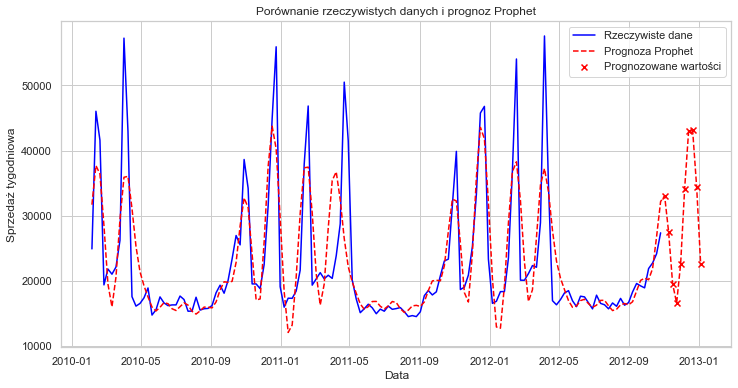

In [192]:
import matplotlib.pyplot as plt

# Przygotowanie danych do wykresu
plt.figure(figsize=(12, 6))

# Wykres rzeczywistych danych
plt.plot(df_grouped.index, df_grouped['Weekly_Sales'], label='Rzeczywiste dane', color='blue')

# Wykres prognoz
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prognoza Prophet', color='red', linestyle='--')

# Wykres rzeczywistych danych (prognozowane wartości)
plt.scatter(forecast_prophet['ds'][-10:], forecast_prophet['yhat'][-10:], color='red', marker='x', label='Prognozowane wartości')

# Ustawienia wykresu
plt.xlabel('Data')
plt.ylabel('Sprzedaż tygodniowa')
plt.title('Porównanie rzeczywistych danych i prognoz Prophet')
plt.legend()
plt.grid(True)
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Random forest
</div>

C:\Users\weron\AppData\Local\Temp/ipykernel_13652/1949277409.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Random Forest MSE: 13405338.994770372
Random Forest RMSE: 3661.330222032748


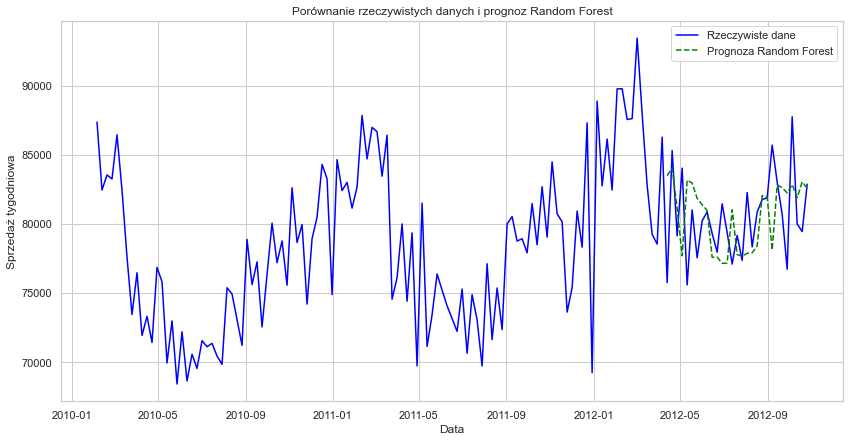

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Zakładamy, że df1 jest już wczytany
# Przefiltruj dane dla konkretnego sklepu i działu
df_filtered = df1[(df1['Store'] == 4) & (df1['Dept'] == 40)]

# Upewnij się, że kolumna 'Date' jest typu datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Grupowanie po dacie i obliczanie zagregowanej wartości Weekly_Sales
df_grouped = df_filtered.groupby('Date').agg({
    'Weekly_Sales': 'sum',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'Christmas': 'max',
    'Labor_Day': 'max',
    'Thanksgiving': 'max',
    'Unemployment': 'mean'
}).reset_index()

# Przygotowanie danych dla Random Forest
df_rf = df_grouped.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Podział na dane treningowe i testowe
train_df, test_df = train_test_split(df_rf, test_size=0.2, shuffle=False)

# Przygotowanie danych do modelu Random Forest
X_train = train_df[['Temperature', 'Fuel_Price', 'Christmas', 'Labor_Day', 'Thanksgiving', 'Unemployment']]
y_train = train_df['y']
X_test = test_df[['Temperature', 'Fuel_Price', 'Christmas', 'Labor_Day', 'Thanksgiving', 'Unemployment']]
y_test = test_df['y']

# Definiowanie i trenowanie modelu Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Prognozowanie na danych testowych
y_pred_rf = model_rf.predict(X_test)

# Obliczanie MSE i RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest RMSE: {rmse_rf}")

# Przygotowanie danych do wizualizacji
test_df['y_pred_rf'] = y_pred_rf

# Wizualizacja wyników
plt.figure(figsize=(14, 7))
plt.plot(df_rf['ds'], df_rf['y'], label='Rzeczywiste dane', color='blue')
plt.plot(test_df['ds'], test_df['y_pred_rf'], label='Prognoza Random Forest', color='green', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Sprzedaż tygodniowa')
plt.title('Porównanie rzeczywistych danych i prognoz Random Forest')
plt.legend()
plt.grid(True)
plt.show()


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Grid search
</div>

C:\Users\weron\AppData\Local\Temp/ipykernel_13652/2562231889.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

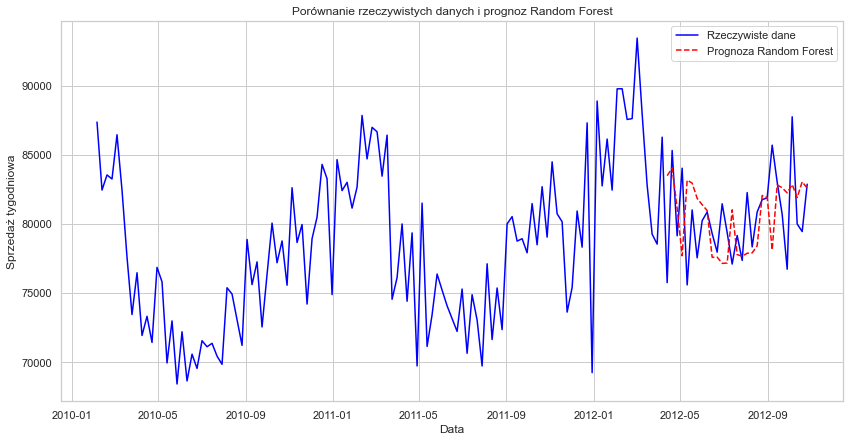

In [205]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from joblib import parallel_backend

# Zakładamy, że df1 jest już wczytany
# Przefiltruj dane dla konkretnego sklepu i działu
df_filtered = df1[(df1['Store'] == 4) & (df1['Dept'] == 40)]

# Upewnij się, że kolumna 'Date' jest typu datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Grupowanie po dacie i obliczanie zagregowanej wartości Weekly_Sales
df_grouped = df_filtered.groupby('Date').agg({
    'Weekly_Sales': 'sum',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'Christmas': 'max',
    'Labor_Day': 'max',
    'Thanksgiving': 'max',
    'Unemployment': 'mean'
}).reset_index()

# Przygotowanie danych dla Random Forest
X = df_grouped.drop(columns=['Date', 'Weekly_Sales'])
y = df_grouped['Weekly_Sales']

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Definiowanie modelu Random Forest
rf = RandomForestRegressor(random_state=42)

# Definiowanie zakresu hiperparametrów do wyszukiwania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Kros-walidacja z GridSearchCV
with parallel_backend('threading'):
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

# Najlepsze hiperparametry
print(f"Best Parameters: {grid_search.best_params_}")

# Model z najlepszymi hiperparametrami
best_rf = grid_search.best_estimator_

# Prognozowanie na danych testowych
y_pred_rf = best_rf.predict(X_test)

# Obliczanie MSE i RMSE na zbiorze testowym
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Test MSE: {mse_rf}")
print(f"Random Forest Test RMSE: {rmse_rf}")

# Wizualizacja wyników
plt.figure(figsize=(14, 7))
plt.plot(df_grouped['Date'], df_grouped['Weekly_Sales'], label='Rzeczywiste dane', color='blue')
plt.plot(df_grouped['Date'].iloc[len(X_train):], y_pred_rf, label='Prognoza Random Forest', color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Sprzedaż tygodniowa')
plt.title('Porównanie rzeczywistych danych i prognoz Random Forest')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\weron\AppData\Local\Temp/ipykernel_13652/4193104674.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Stacking Test MSE: 12678011.489267927
Stacking Test RMSE: 3560.619537281107


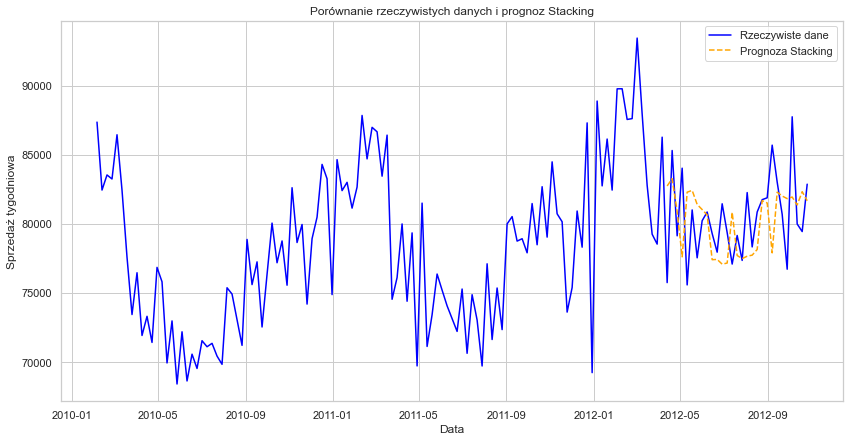

In [209]:
import pandas as pd
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from joblib import parallel_backend

# Zakładamy, że df1 jest już wczytany
# Przefiltruj dane dla konkretnego sklepu i działu
df_filtered = df1[(df1['Store'] == 4) & (df1['Dept'] == 40)]

# Upewnij się, że kolumna 'Date' jest typu datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Grupowanie po dacie i obliczanie zagregowanej wartości Weekly_Sales
df_grouped = df_filtered.groupby('Date').agg({
    'Weekly_Sales': 'sum',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'Christmas': 'max',
    'Labor_Day': 'max',
    'Thanksgiving': 'max',
    'Unemployment': 'mean'
}).reset_index()

# Przygotowanie danych dla StackingRegressor
X = df_grouped.drop(columns=['Date', 'Weekly_Sales'])
y = df_grouped['Weekly_Sales']

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Definiowanie bazowych modeli i modelu końcowego
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', xgb.XGBRegressor(random_state=42))
]

stacking_reg = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)

# Fitting modelu
stacking_reg.fit(X_train, y_train)

# Prognozowanie na danych testowych
y_pred_stack = stacking_reg.predict(X_test)

# Obliczanie MSE i RMSE na zbiorze testowym
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)

print(f"Stacking Test MSE: {mse_stack}")
print(f"Stacking Test RMSE: {rmse_stack}")

# Wizualizacja wyników
plt.figure(figsize=(14, 7))
plt.plot(df_grouped['Date'], df_grouped['Weekly_Sales'], label='Rzeczywiste dane', color='blue')

# Odczyt prognoz
y_pred_train = stacking_reg.predict(X_train)
y_pred_full = np.concatenate((y_pred_train, y_pred_stack))

# Wizualizacja na danych testowych
plt.plot(df_grouped['Date'].iloc[len(X_train):], y_pred_stack, label='Prognoza Stacking', color='orange', linestyle='--')

plt.xlabel('Data')
plt.ylabel('Sprzedaż tygodniowa')
plt.title('Porównanie rzeczywistych danych i prognoz Stacking')
plt.legend()
plt.grid(True)
plt.show()


In [208]:
! pip install xgboost

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
